# Compare each observation with simulation M-2

Section 1 - Import code and make definitions

Section 2 - Compare each observation with simulation M-2

## Section 1 - Import code and make definitions
## Section 2 - Compare each observation with simulation M-2 
## Section 3 - Compare observations with events modeled in Onodera et al., 2021 and Onodera et al., 2023

### Before running for the first time you will need to execute Code Block 1 in TauP_plots.ipynb

### The simulations are stored at the Zenodo repository https://doi.org/10.5281/zenodo.10631693 

### You will need to extract the simulations and store them in top_dir
### e.g. if you have a folder called 128b_VPREMOON_atten_surface_2 and it is in /Users/cnunn/lunar_data/axisem3d_runs/ then the top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'

In [3]:
# top level dir 

######## 
# Extract the AxiSEM3D runs to a directory and set the top directory HERE 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

In [29]:
# %matplotlib notebook
%matplotlib inline

# calculate the taup models
from obspy.taup import TauPyModel
import time

calculated_VPREMOON = TauPyModel(model='VPREMOON_atten_taup')
calculated_ISSI_M1 = TauPyModel(model='ISSI_MOON_M1_atten_taup')
calculated_VPREMOON_atten_no_LVZ_taup = TauPyModel(model='VPREMOON_atten_no_LVZ_taup')

calculated_taup_dict =	{
  "VPREMOON_taup": calculated_VPREMOON,
  "ISSI_MOON_M1_taup": calculated_ISSI_M1,
    'VPREMOON_atten_no_LVZ_taup':calculated_VPREMOON_atten_no_LVZ_taup
}

from obspy.core import Stream, UTCDateTime
from obspy import read_inventory

from postprocessing_util_observations import get_observations_local
from postprocessing_util import get_all_streams_from_netcdf
from postprocessing_util import plot_epicentral_distance_taup
from postprocessing_util import plot_envelope_taup

import math

phase_list_ISSI = ["P", "PP", "PS", "PSS", "2.15kmps","0.57kmps"]
phase_list_VPREMOON_layered = [
    "P",
    "PS",
    "2.47kmps",
    "0.77kmps",
    "0.47kmps"
]

phase_list_VPREMOON_layered_no_LVZ = [
    "P",
    "PS",
    "2.27kmps",
    "1.66kmps",
    "1.21kmps"
]




distance_examples={
    2:2.167025997371414,
    5:5.075044339909034,
    25:25.432357813795228,
    28:28.047339965833054,
    34:34.560784470873635,
    57:57.67071530277473
}
    
    
# epicentral distances of the events used     
# A13/S-IVB 4.480908613215989
# A14/S-IVB 5.783787517596895
# A15/S-IVB 11.718510058287118
# A15/S-IVB 6.118664372615061
# A16/S-IVB 5.075044339909034
# A16/S-IVB 9.054122437295218
# A16/S-IVB 36.37690556827287
# A17/S-IVB 11.13215379702135
# A17/S-IVB 5.161473408558756
# A17/S-IVB 34.01814904542429
# A17/S-IVB 28.047339965833054
# A12/LM 2.4252731172780972
# A14/LM 3.8036577155384563
# A14/LM 2.167025997371414
# A15/LM 37.23510859020209
# A15/LM 34.560784470873635
# A15/LM 3.0396554713670882
# A17/LM 57.67071530277473
# A17/LM 52.68194068762792
# A17/LM 25.432357813795228
# A17/LM 32.48706382198207


In [5]:
# location of the data 

catalogs=['input_files/Nunn_2024_artificial_impacts_picks.xml']

inv = read_inventory('input_files/local_MSEED/inventory.xml')

In [6]:
# get the observations (this includes using VPREMOON_taup to mark the P and S arrivals)
original_observation_stream_local_MH = get_observations_local(channel='MH*',model_taup=calculated_taup_dict['VPREMOON_taup'],catalog=catalogs[0],inv=inv)

A13/S-IVB 4.480908613215989
A14/S-IVB 5.783787517596895
A15/S-IVB 11.718510058287118
A15/S-IVB 6.118664372615061
A16/S-IVB 5.075044339909034
A16/S-IVB 9.054122437295218
A16/S-IVB 36.37690556827287
A17/S-IVB 11.13215379702135
A17/S-IVB 5.161473408558756
A17/S-IVB 34.01814904542429
A17/S-IVB 28.047339965833054
A12/LM 2.4252731172780972
A14/LM 3.8036577155384563
A14/LM 2.167025997371414
A15/LM 37.23510859020209
A15/LM 34.560784470873635
A15/LM 3.0396554713670882
A17/LM 57.67071530277473
A17/LM 52.68194068762792
A17/LM 25.432357813795228
A17/LM 32.487063821982076


In [7]:
original_stream_dict = {}
original_stream_obs_dict = {}

############################################################################
# specify a run name
run = '145we_ISSI_atten_linear50_2'
run_title = "ISSI M1, ±50% scatter linear from 0 to 50 km, surface explosion"
short_title = "M1, ±50% scatter (linear from 0-50 km)  M-2"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
print('Models read in')


Min/Max R -2.577415 1.2928319
Min/Max T -1.341222 1.2182254
Min/Max Z -0.007234675 17.365479
Models read in


## Section 2 - Compare each observation with simulation M-2 

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 0.0049232508783050785
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 2.167025997371414
Suppressing secondary arrivals


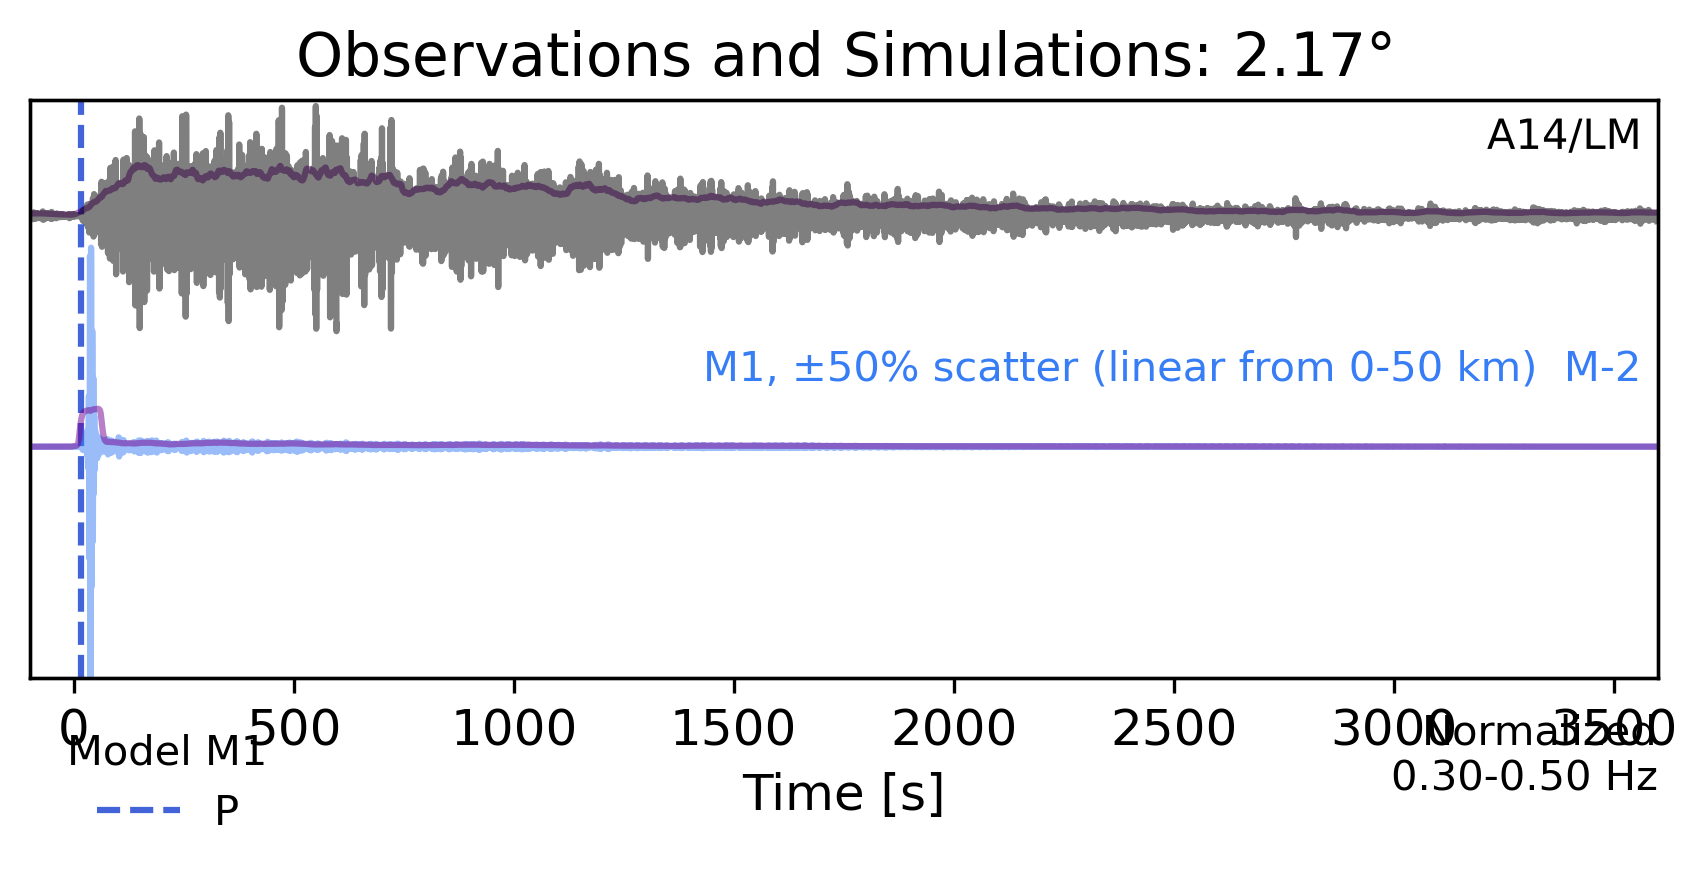

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 0.0029805000632060156
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 2.4252731172780972
Suppressing secondary arrivals


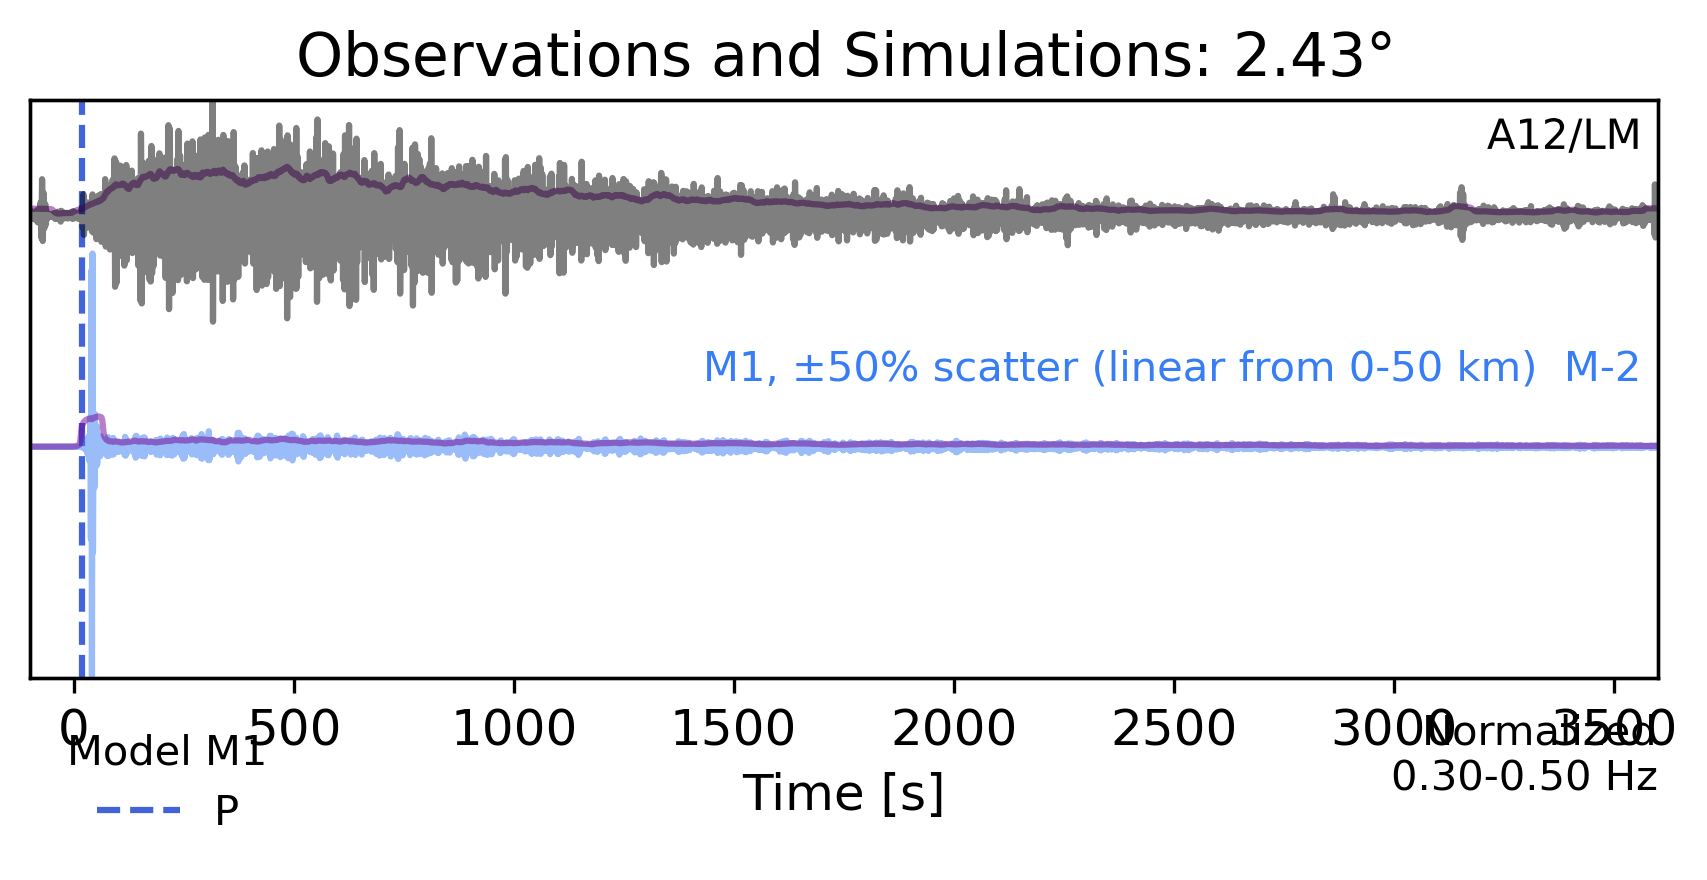

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 0.0018590774241983917
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 3.0396554713670882
Suppressing secondary arrivals


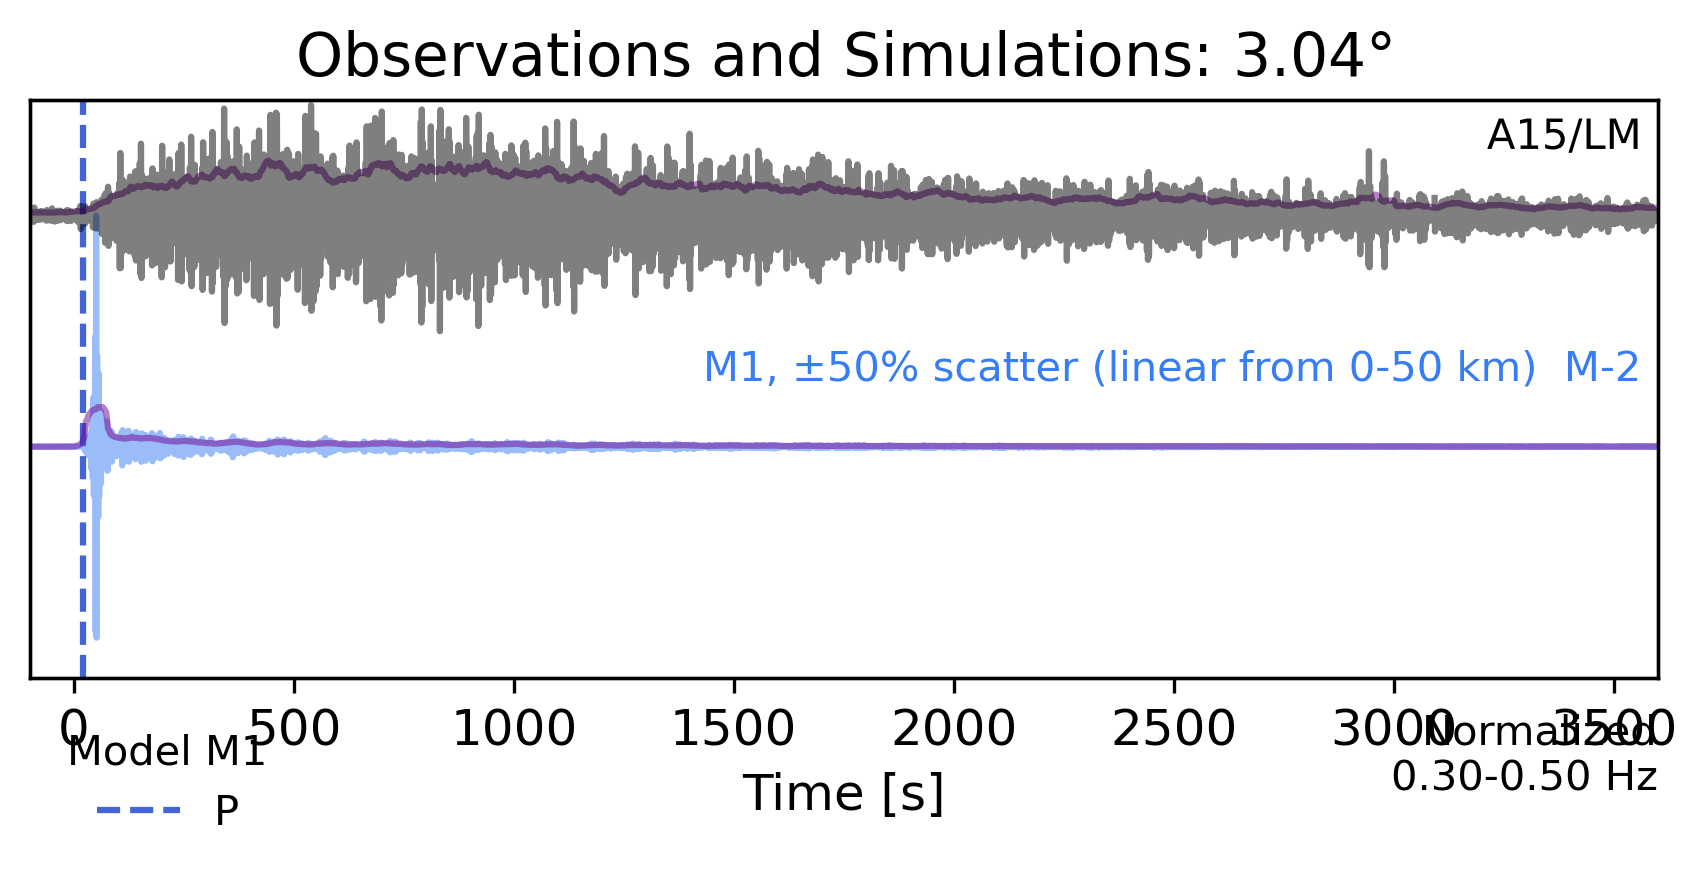

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 0.0016382055419704872
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 3.8036577155384563
Suppressing secondary arrivals


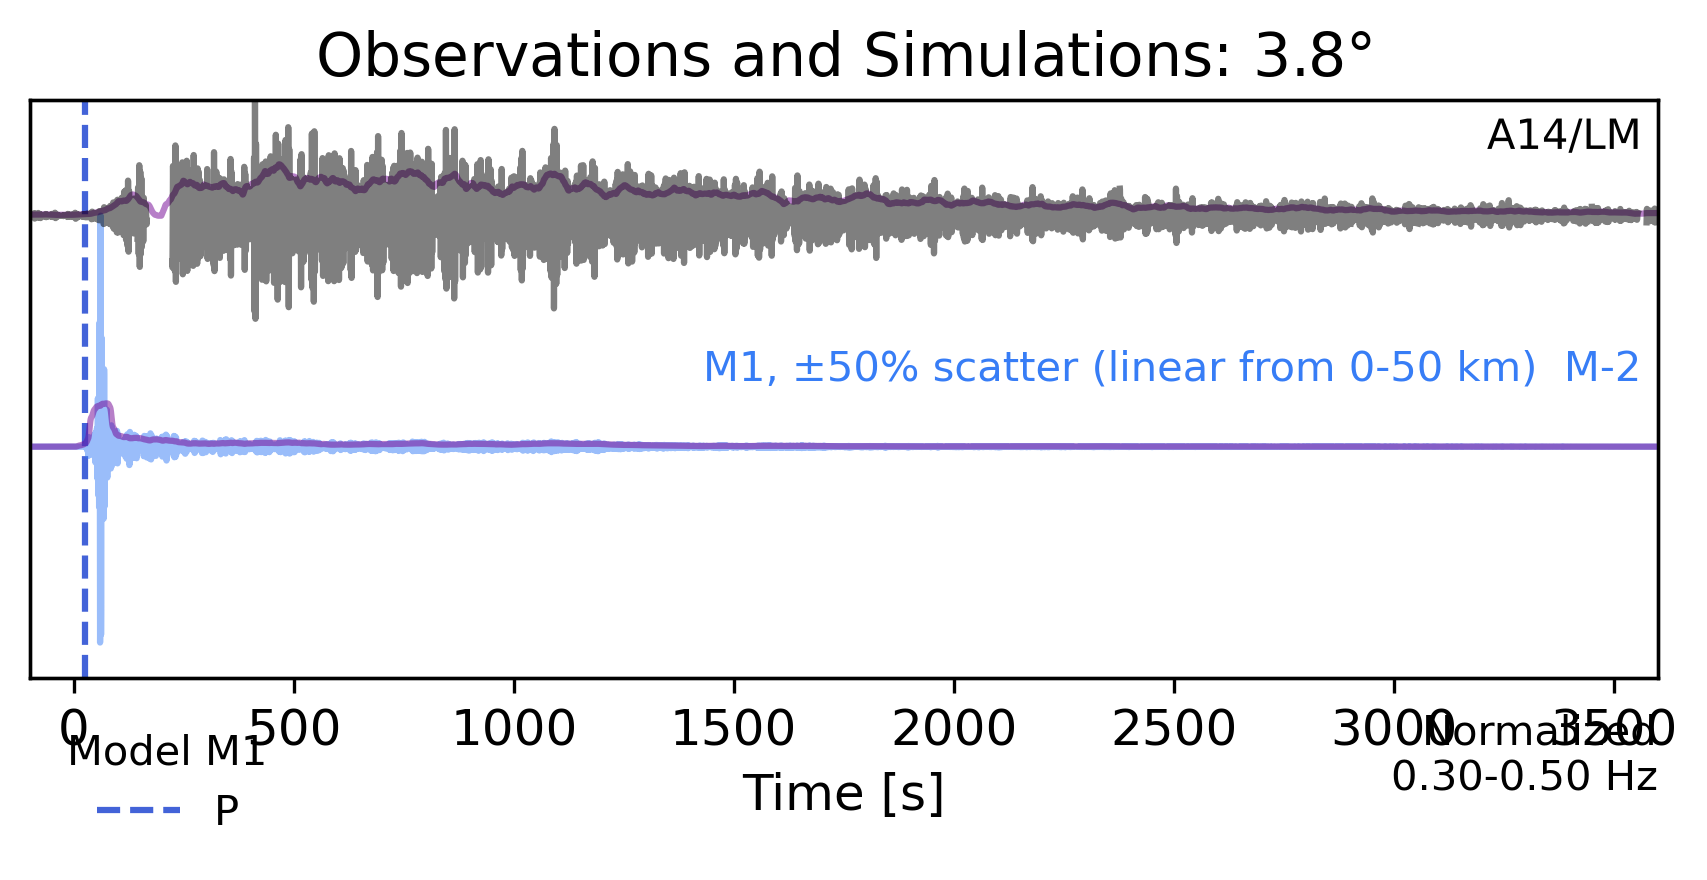

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 0.00036851036414886607
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 4.480908613215989
Suppressing secondary arrivals


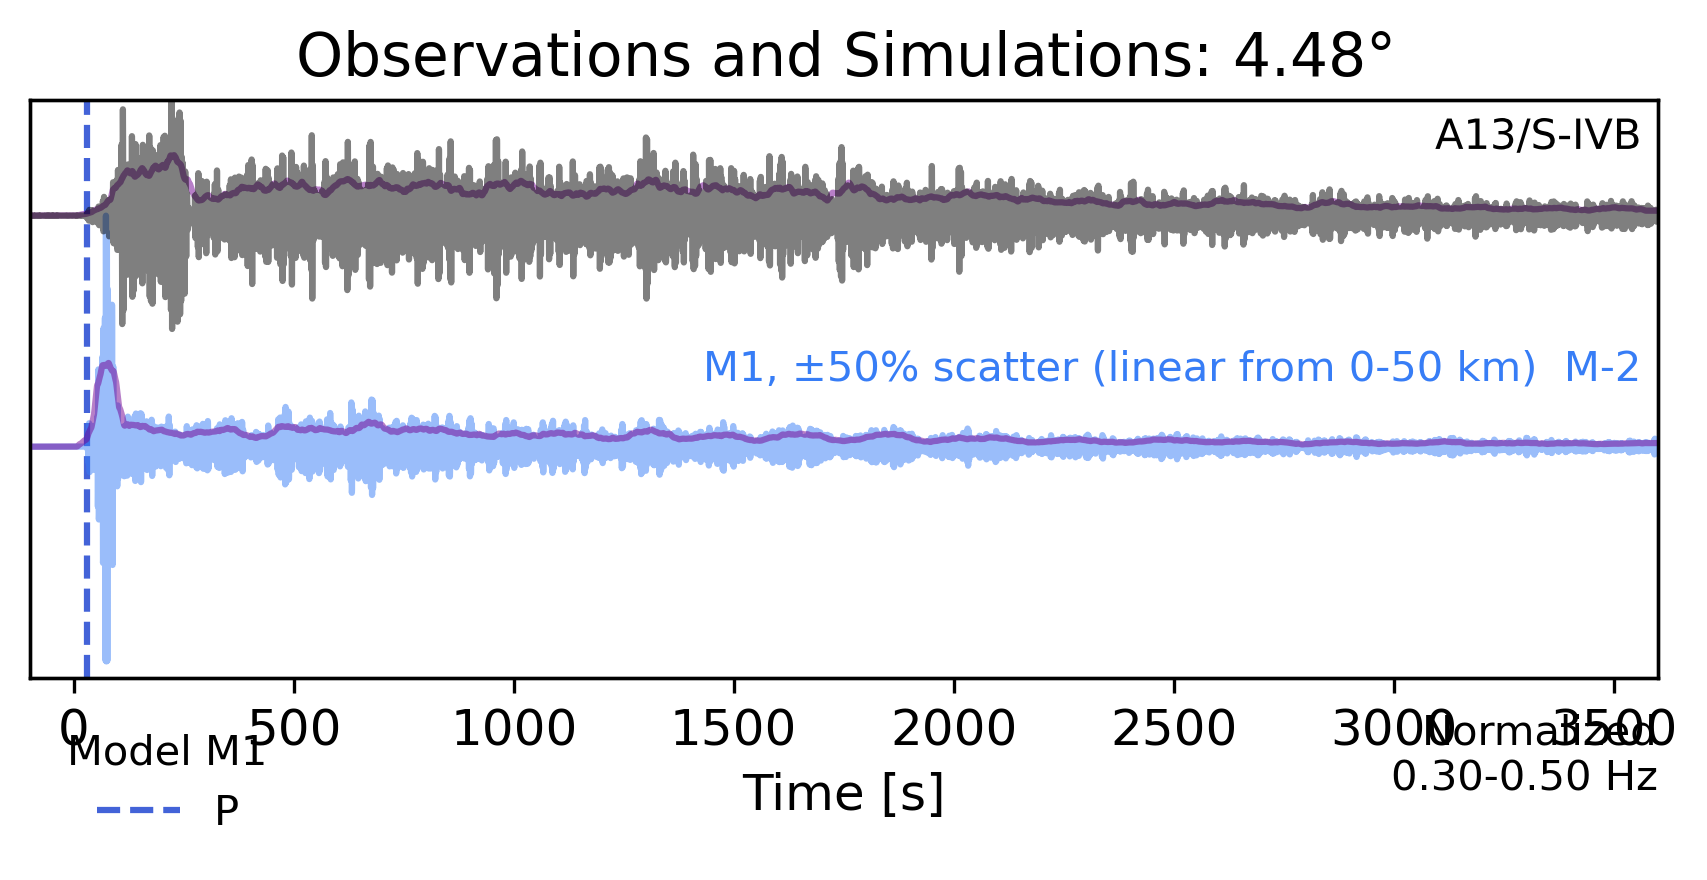

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 0.00040942864476554904
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 5.075044339909034
Suppressing secondary arrivals


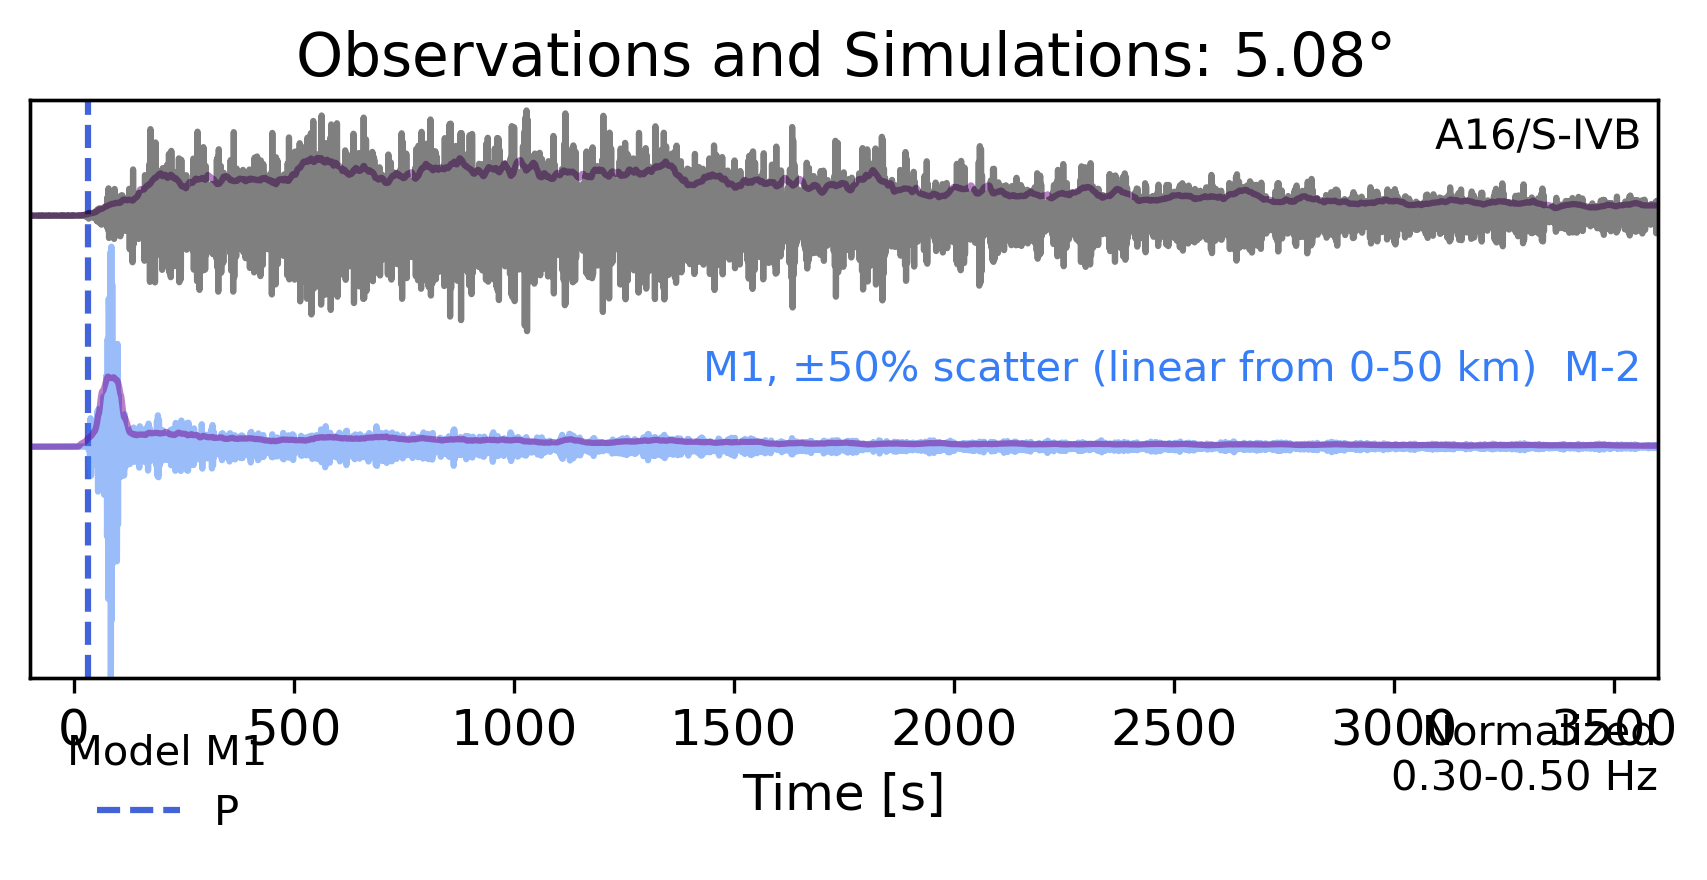

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 0.00037368147304856706
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 5.161473408558756
Suppressing secondary arrivals


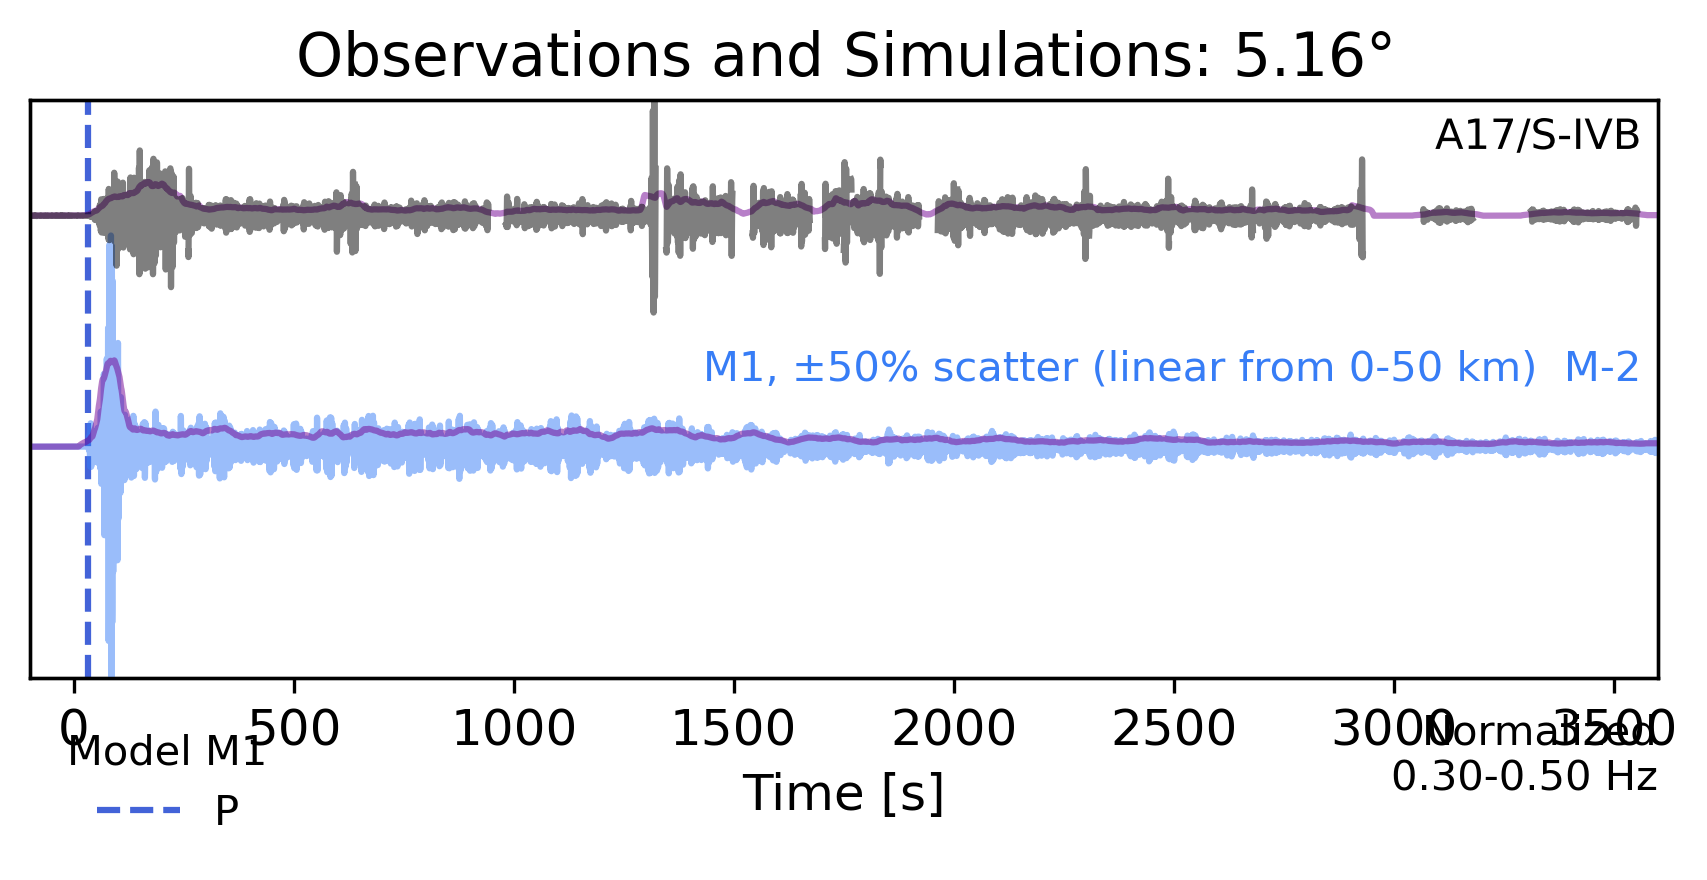

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 0.0008581964140580311
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 5.783787517596895
Suppressing secondary arrivals


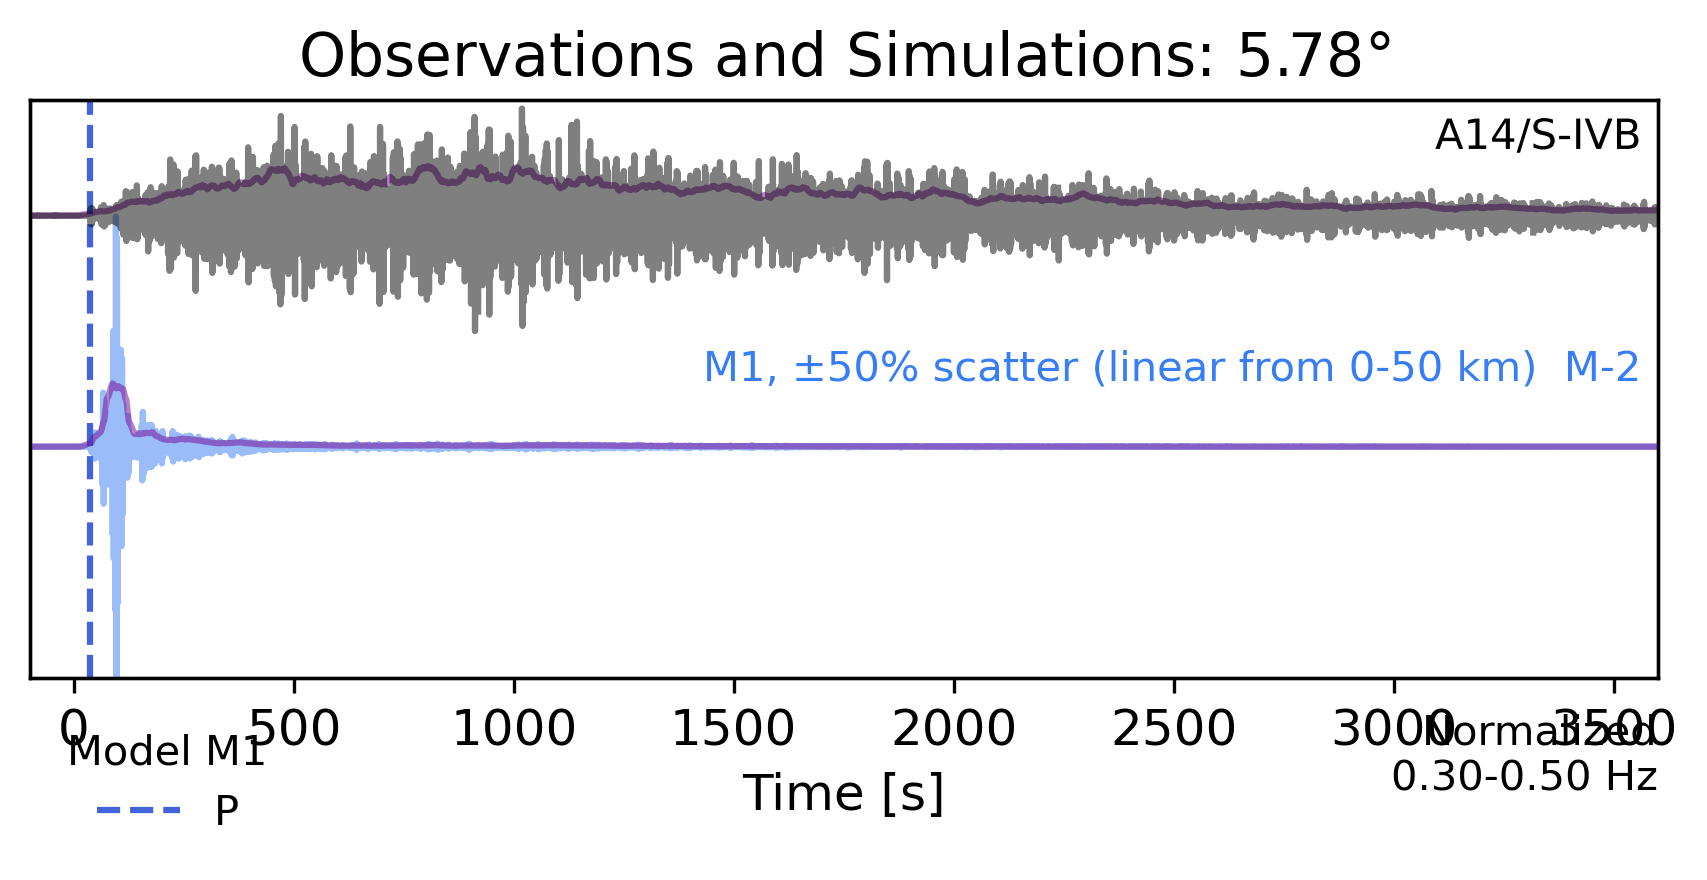

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 0.0002616767088494499
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 6.118664372615061
Suppressing secondary arrivals


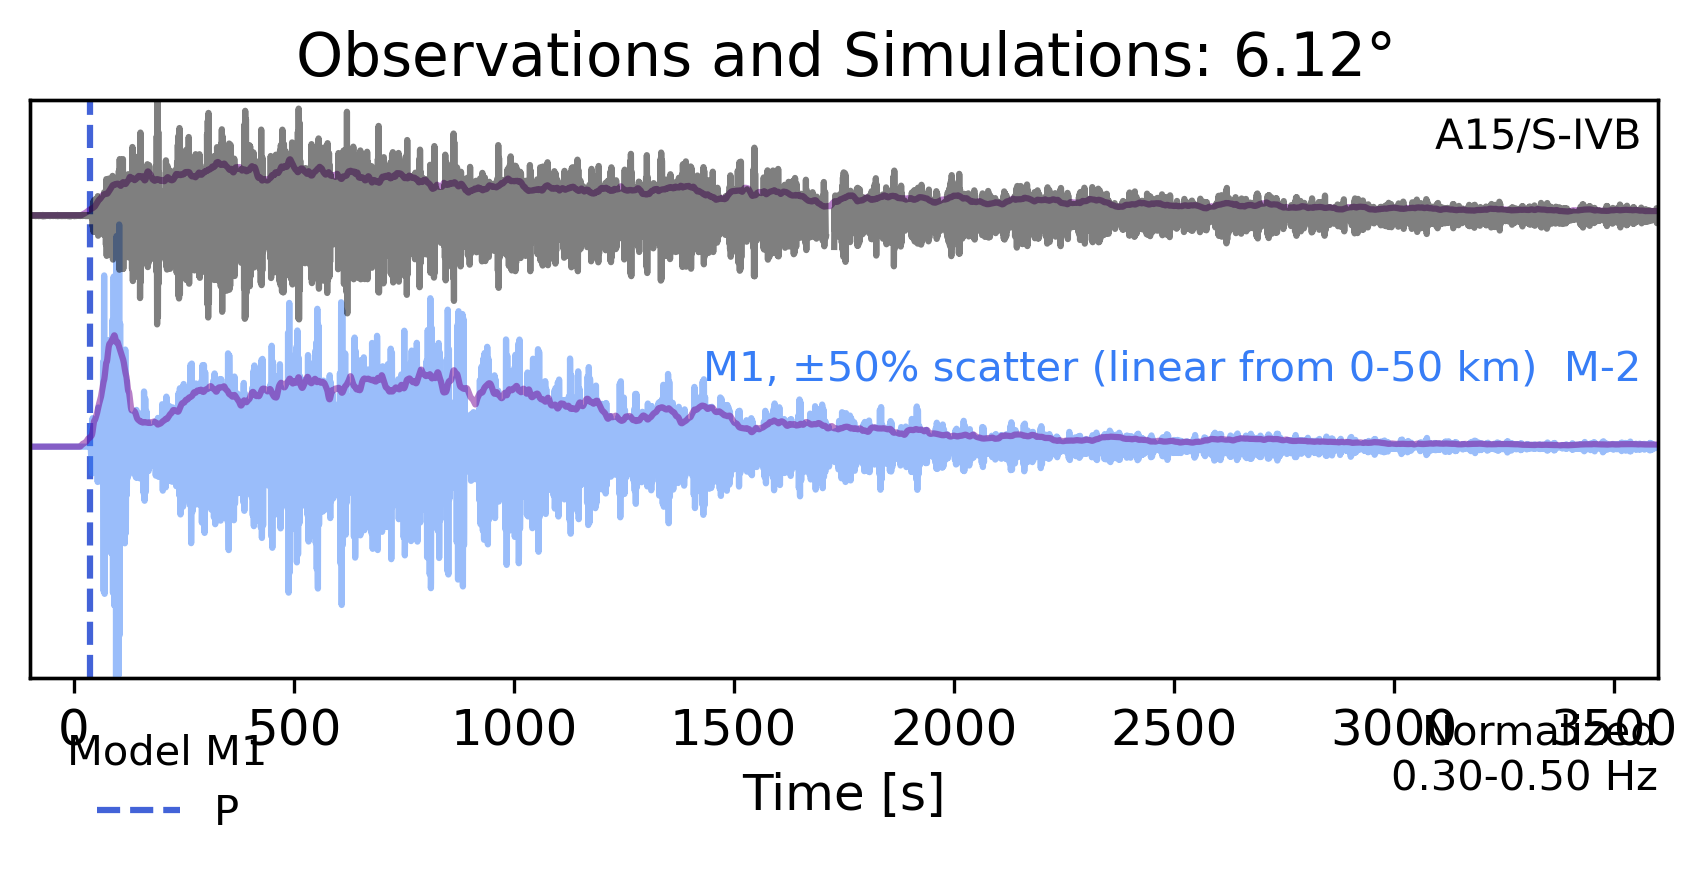

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 0.00022851393699153635
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 9.054122437295218
Suppressing secondary arrivals


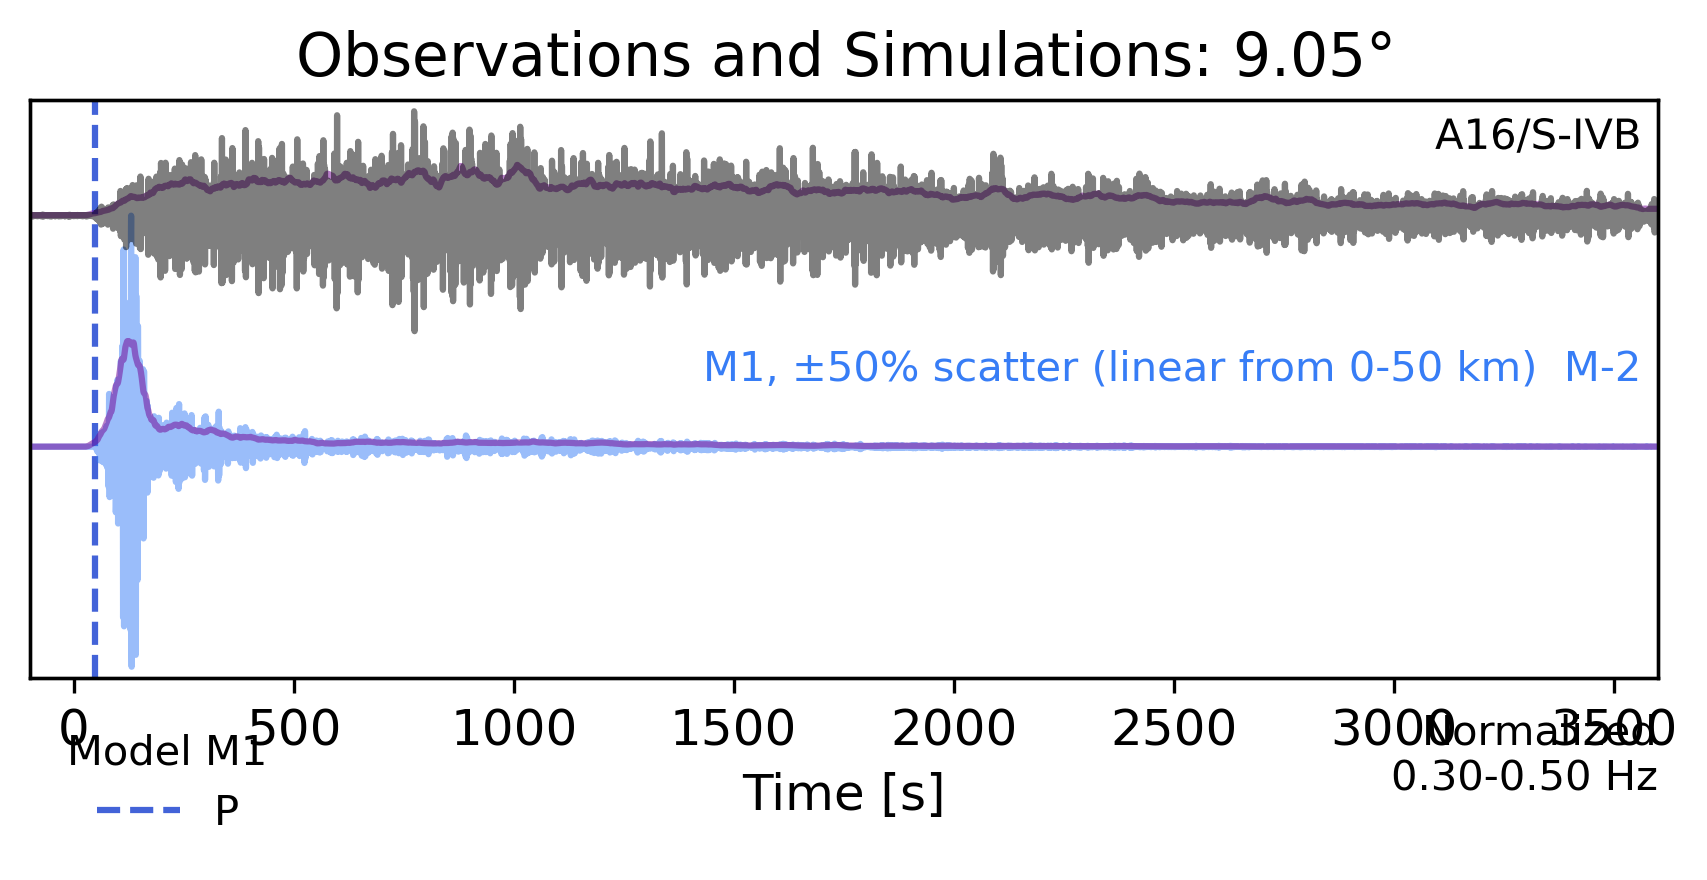

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 0.00010109520395555438
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 11.13215379702135
Suppressing secondary arrivals


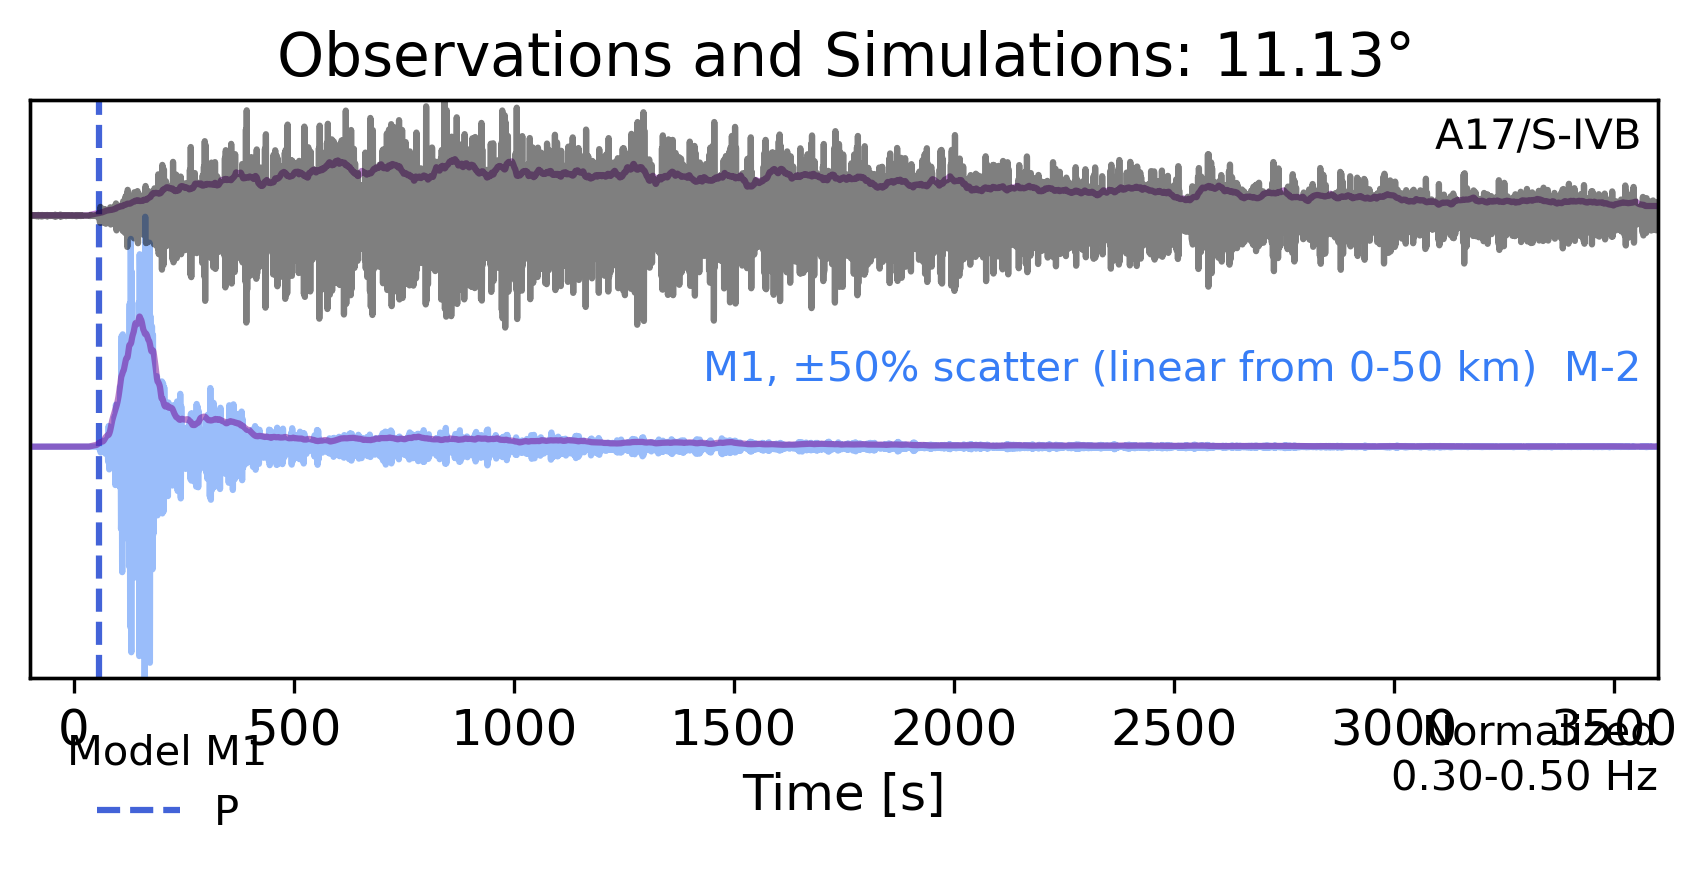

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 0.00010022085423563745
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 11.718510058287118
Suppressing secondary arrivals


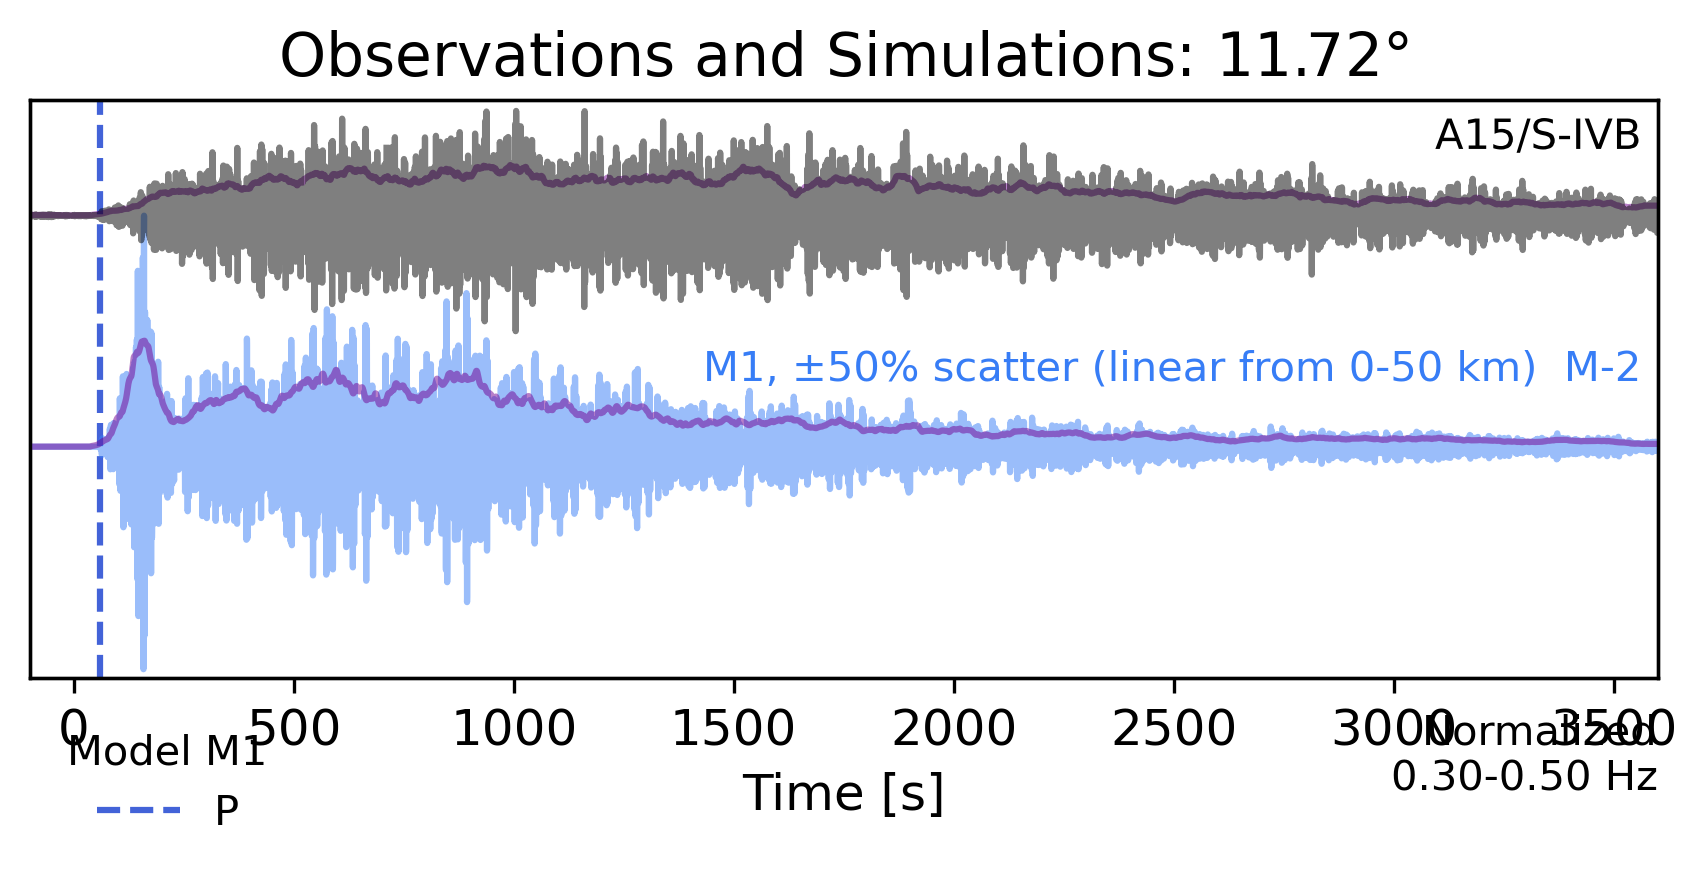

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 2.479602670233738e-05
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 25.432357813795228
Suppressing secondary arrivals


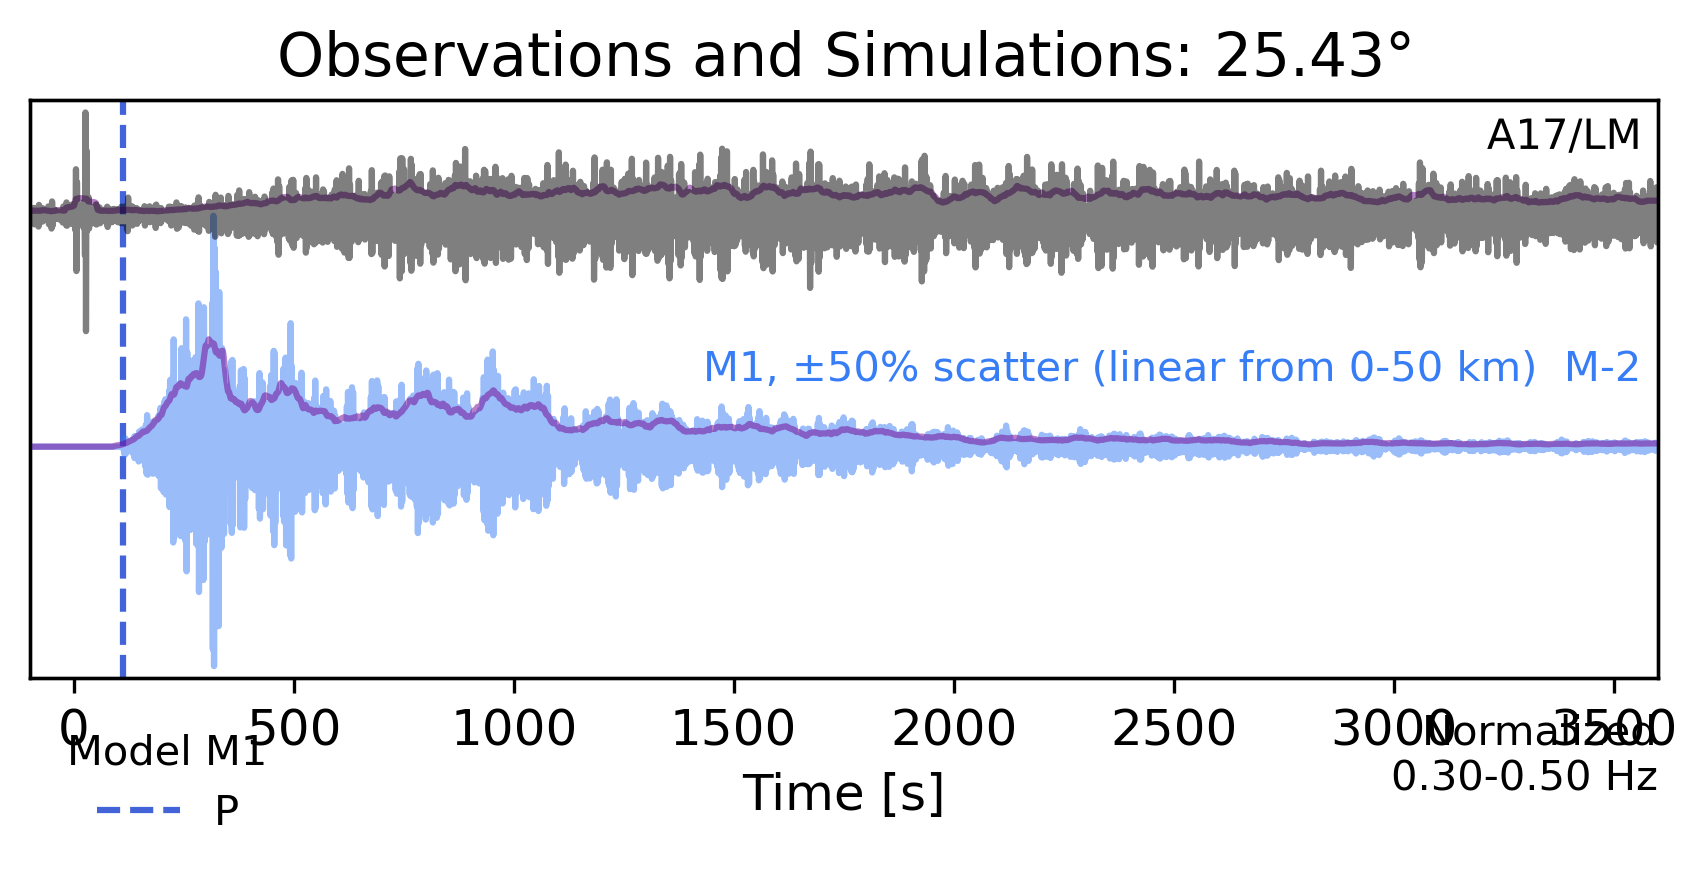

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 1.4482191358728293e-05
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 28.047339965833054
Suppressing secondary arrivals


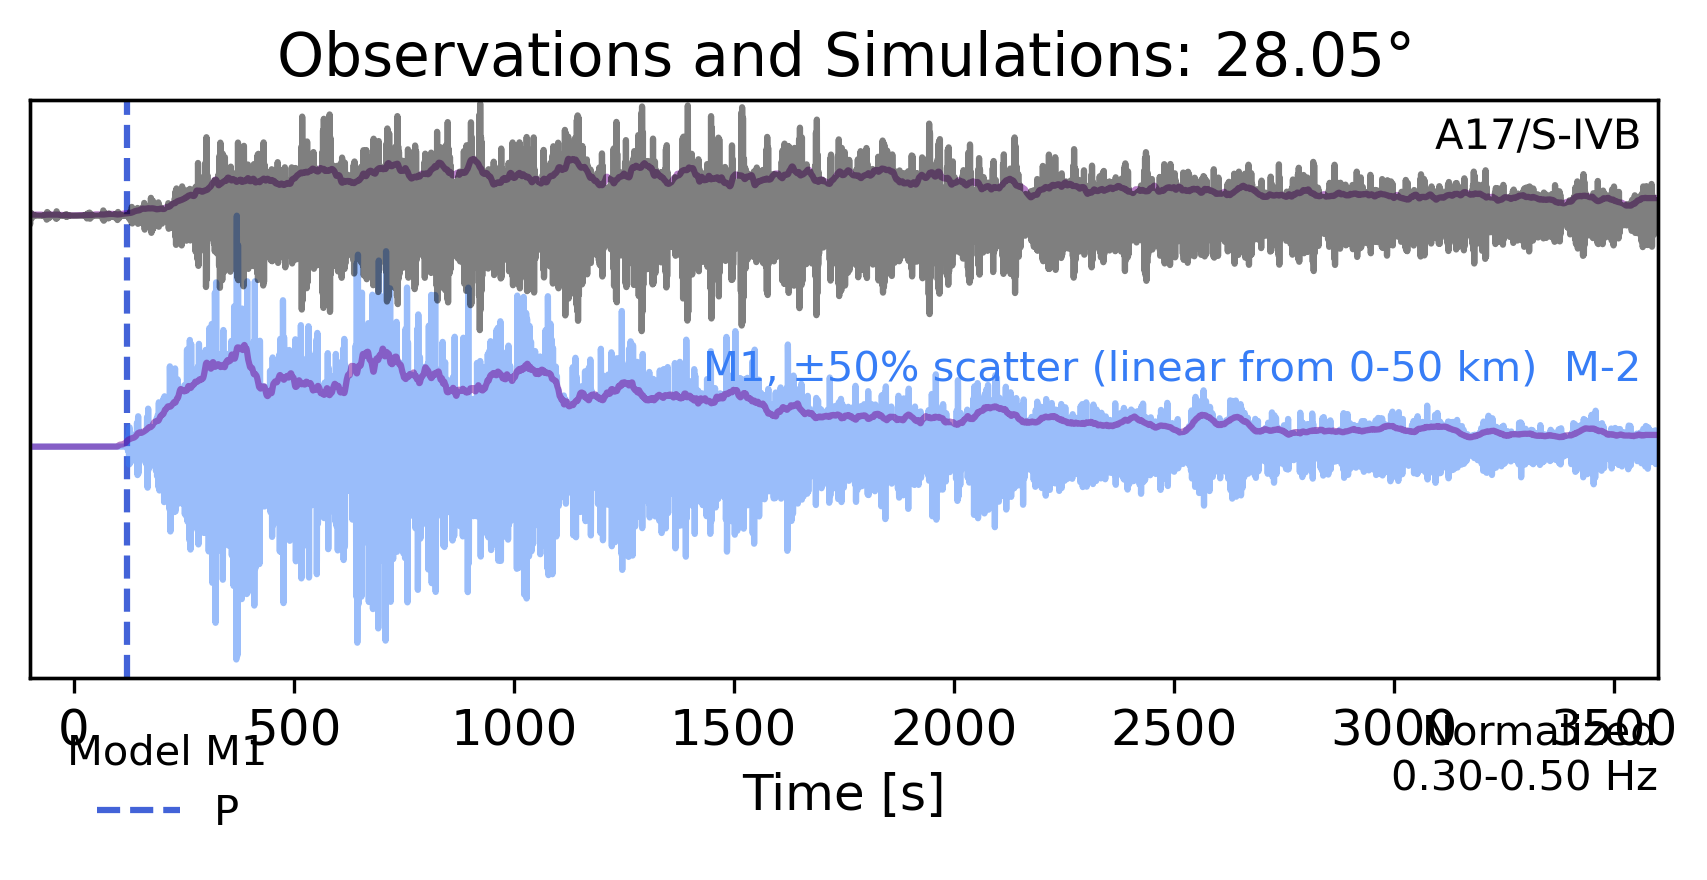

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 1.2657860373803922e-05
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 32.487063821982076
Suppressing secondary arrivals


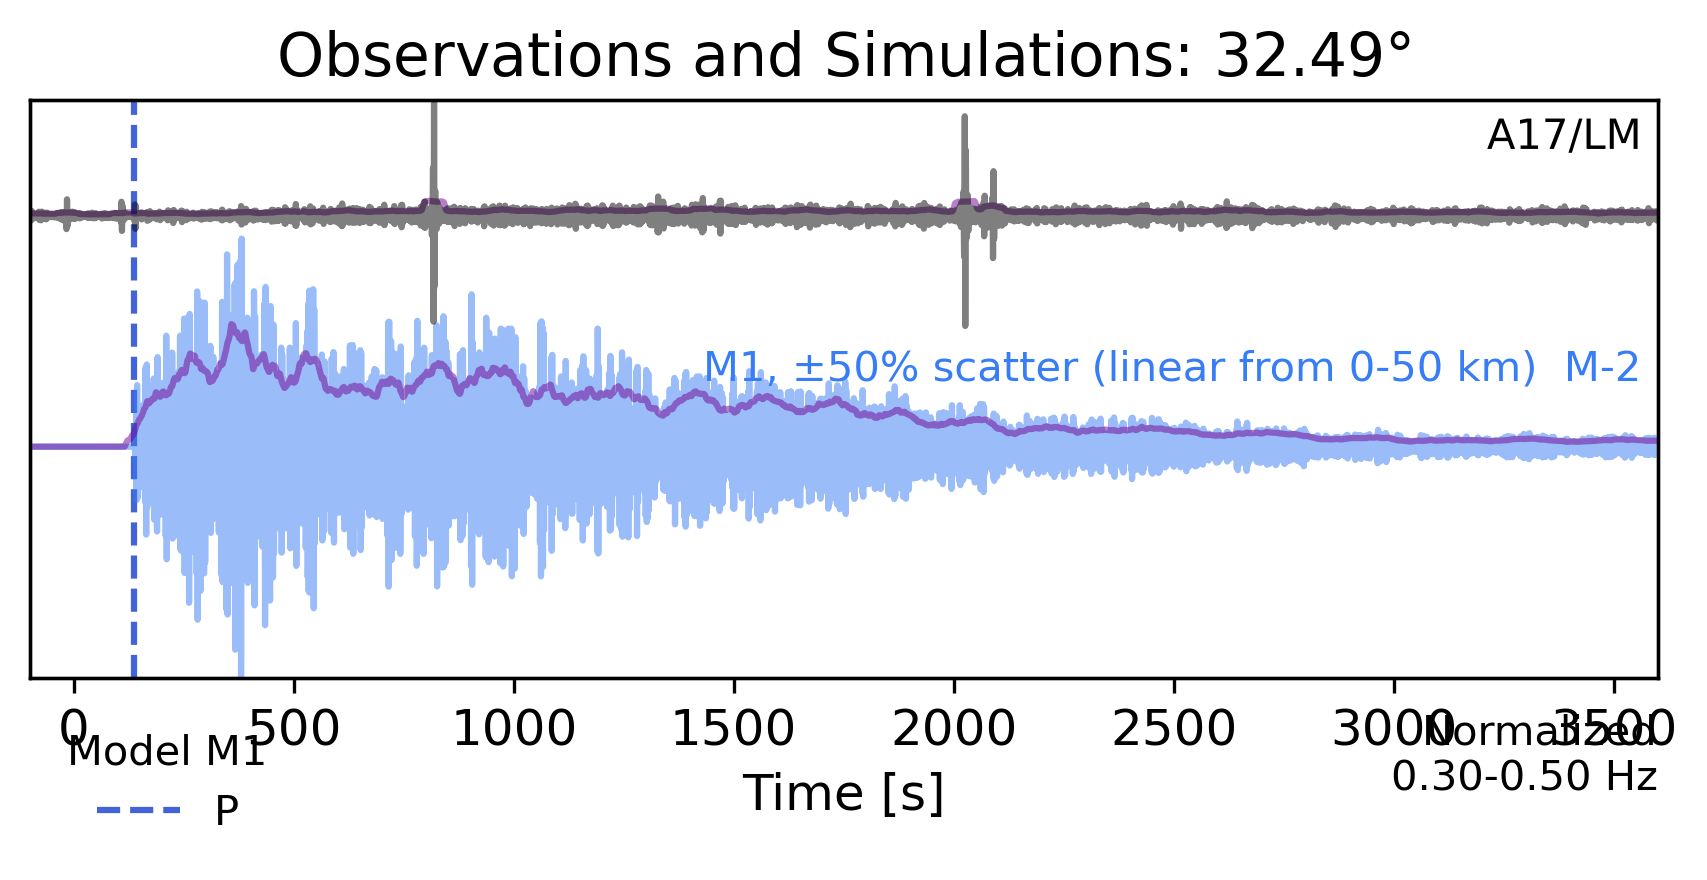

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 2.0837315875347408e-05
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 34.01814904542429
Suppressing secondary arrivals


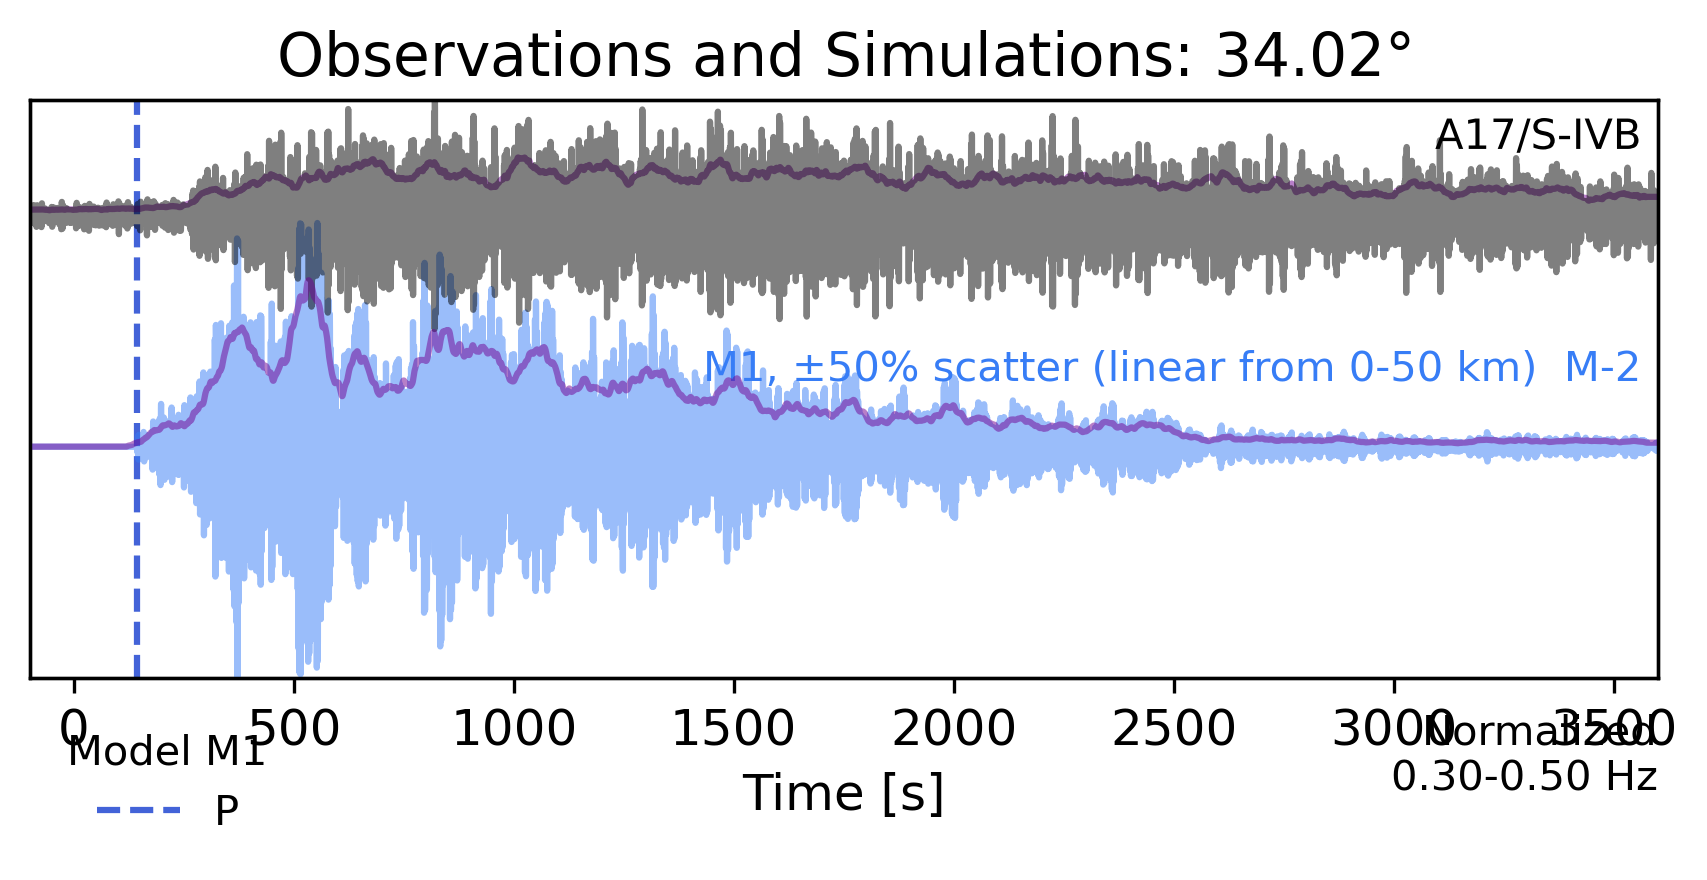

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 9.904591620880714e-06
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 34.560784470873635
Suppressing secondary arrivals


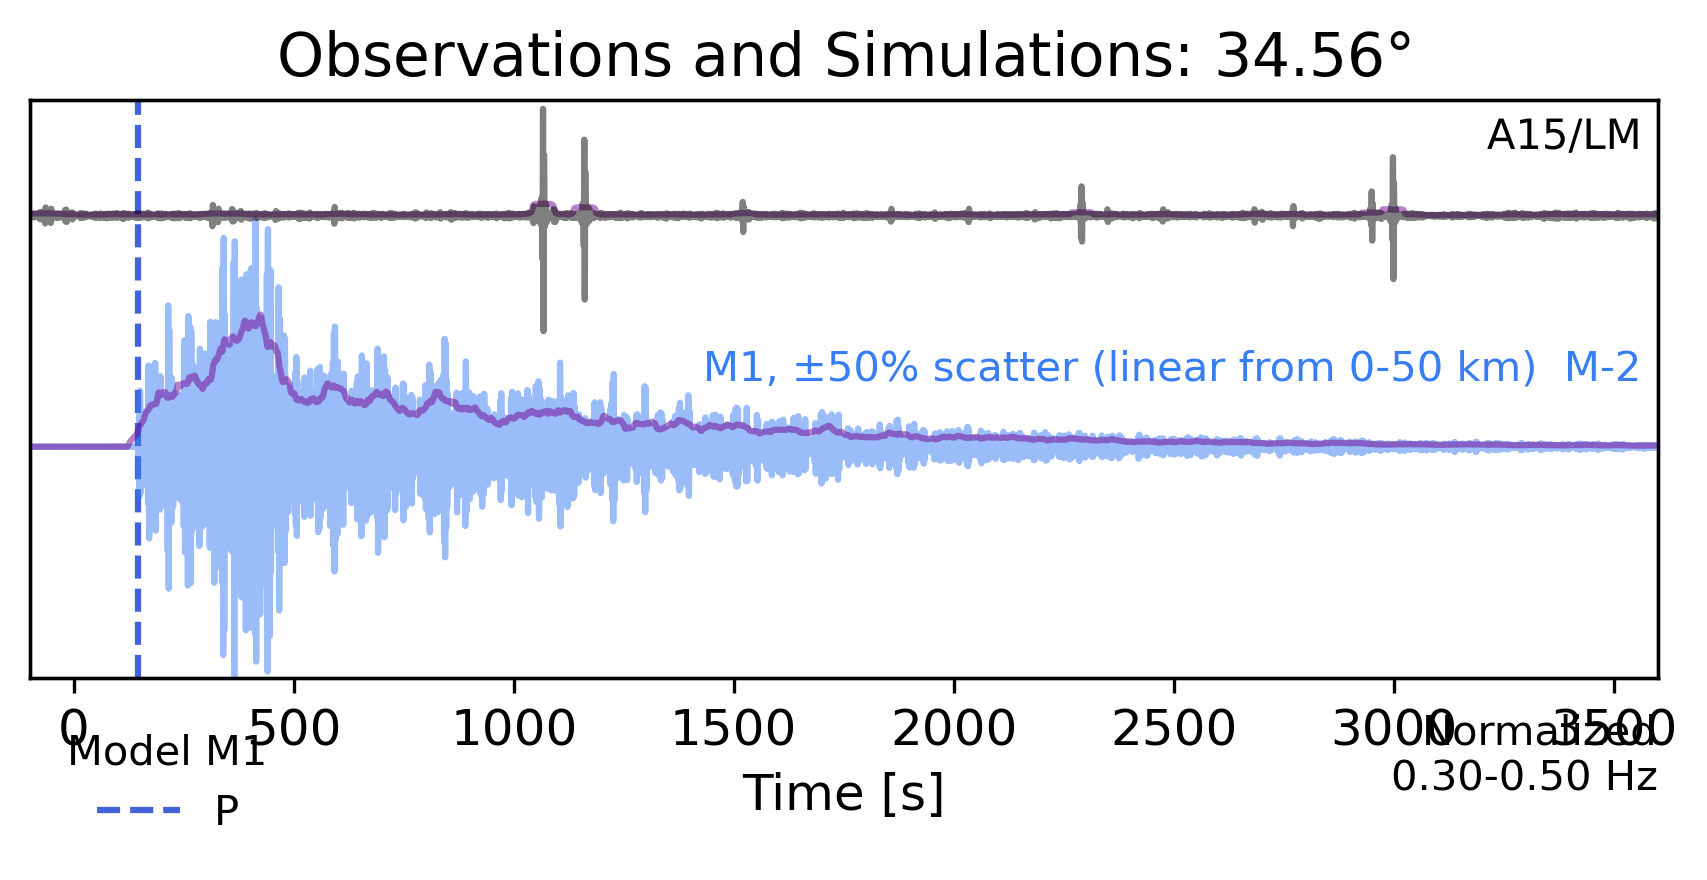

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 1.135635072345149e-05
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 36.37690556827287
Suppressing secondary arrivals


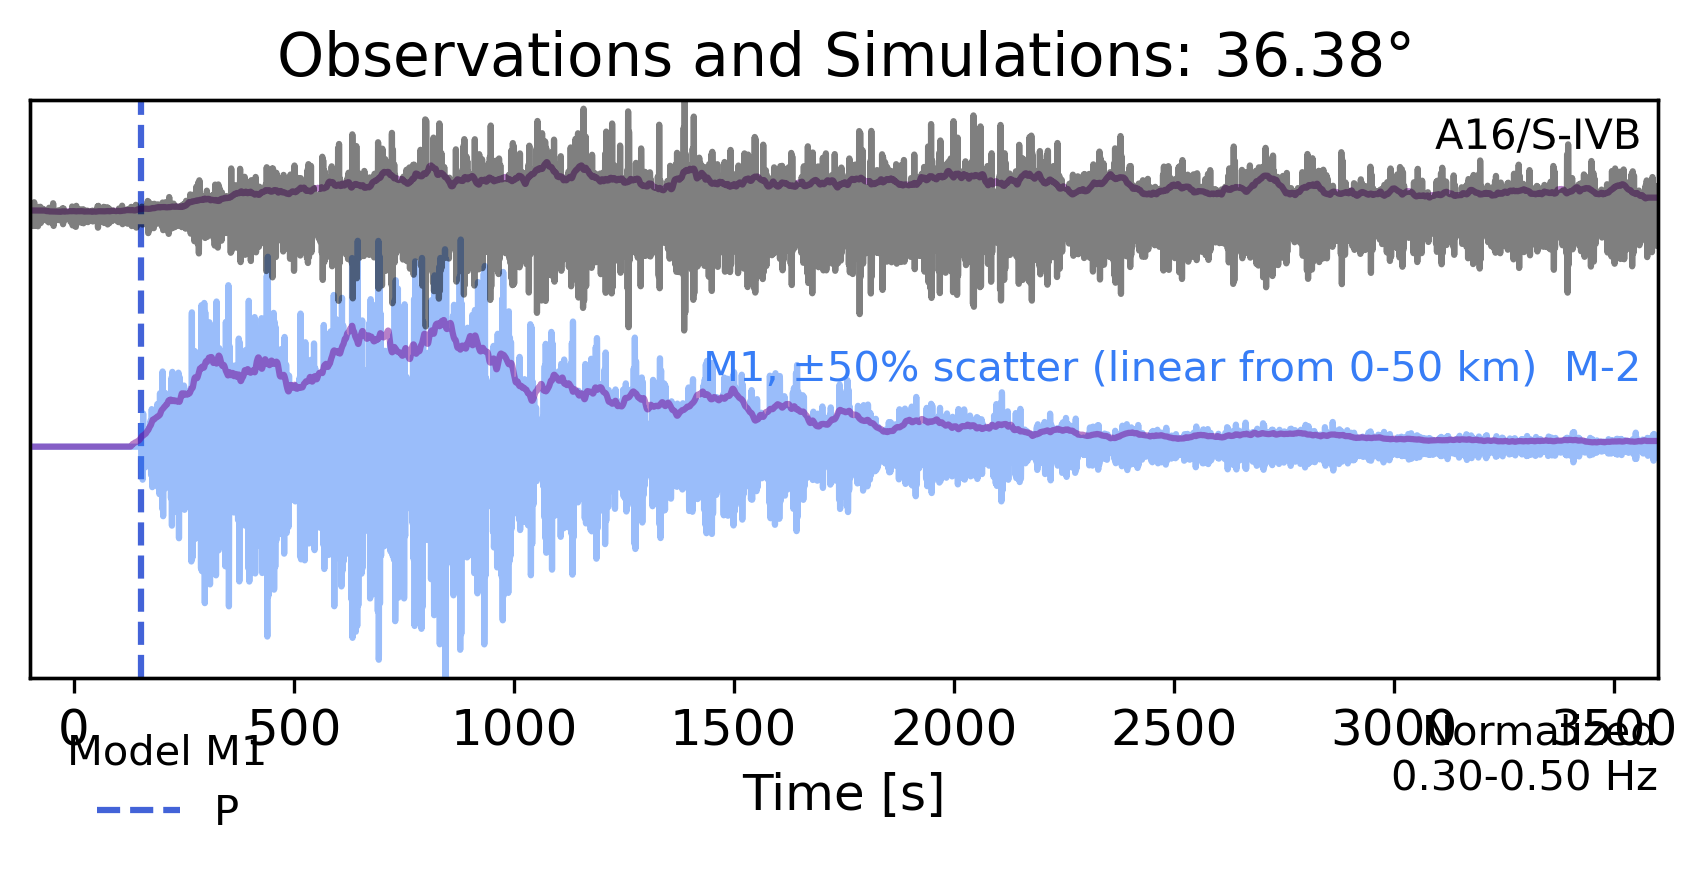

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 6.6293771979287434e-06
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 37.23510859020209
Suppressing secondary arrivals


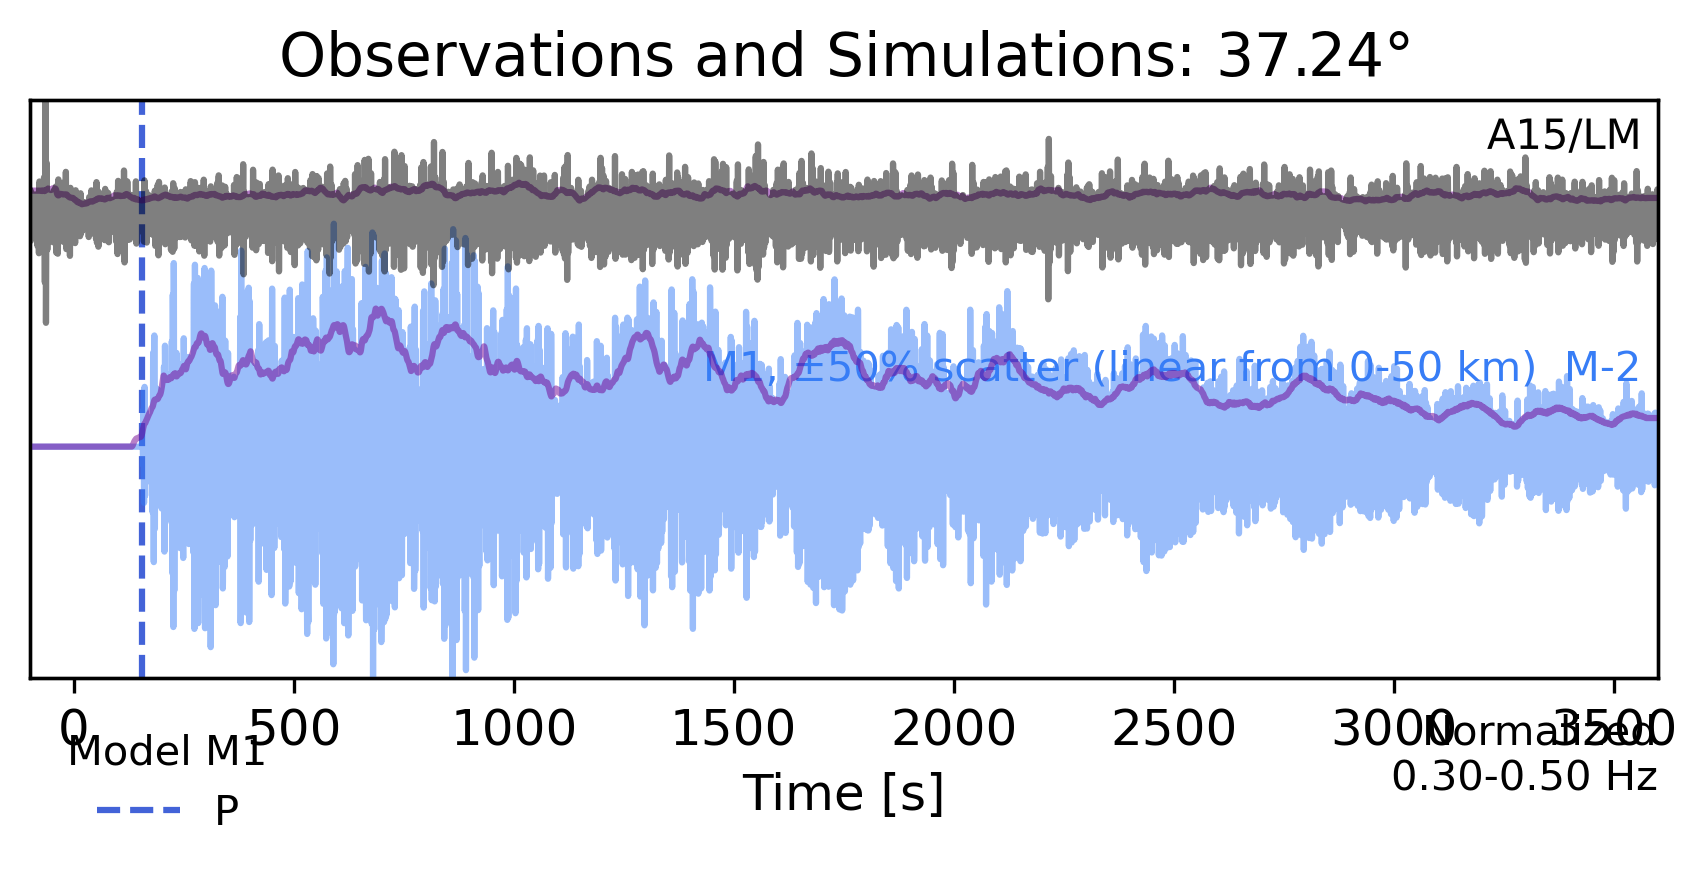

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 7.078400186207117e-06
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 52.68194068762792
Suppressing secondary arrivals


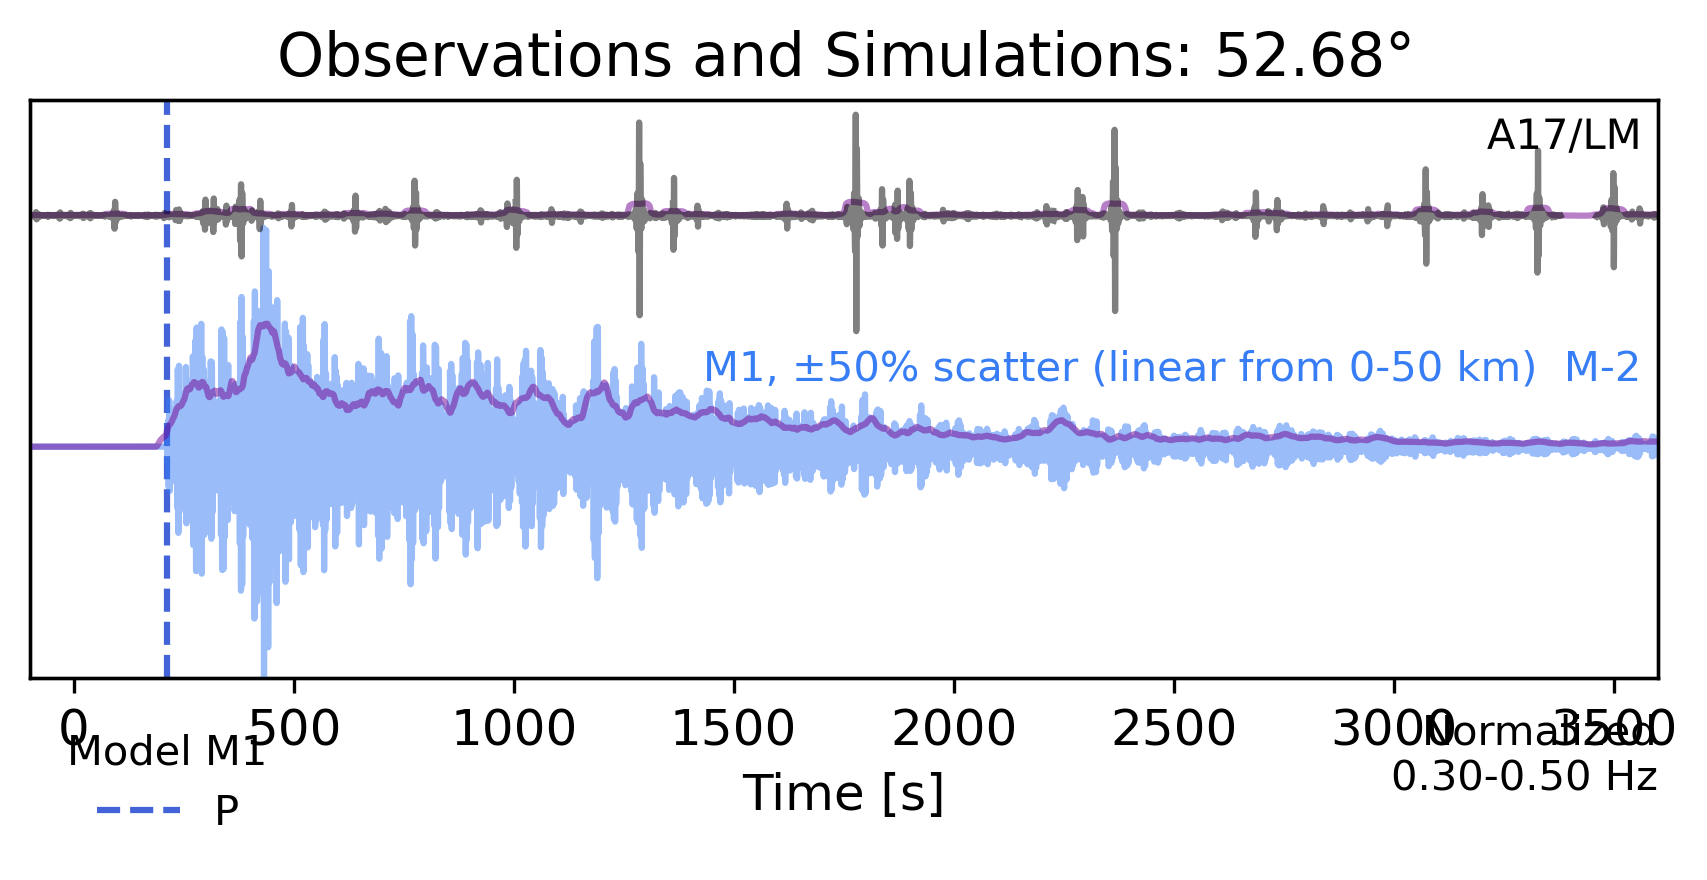

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 7.897534525801258e-06
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 57.67071530277473
Suppressing secondary arrivals


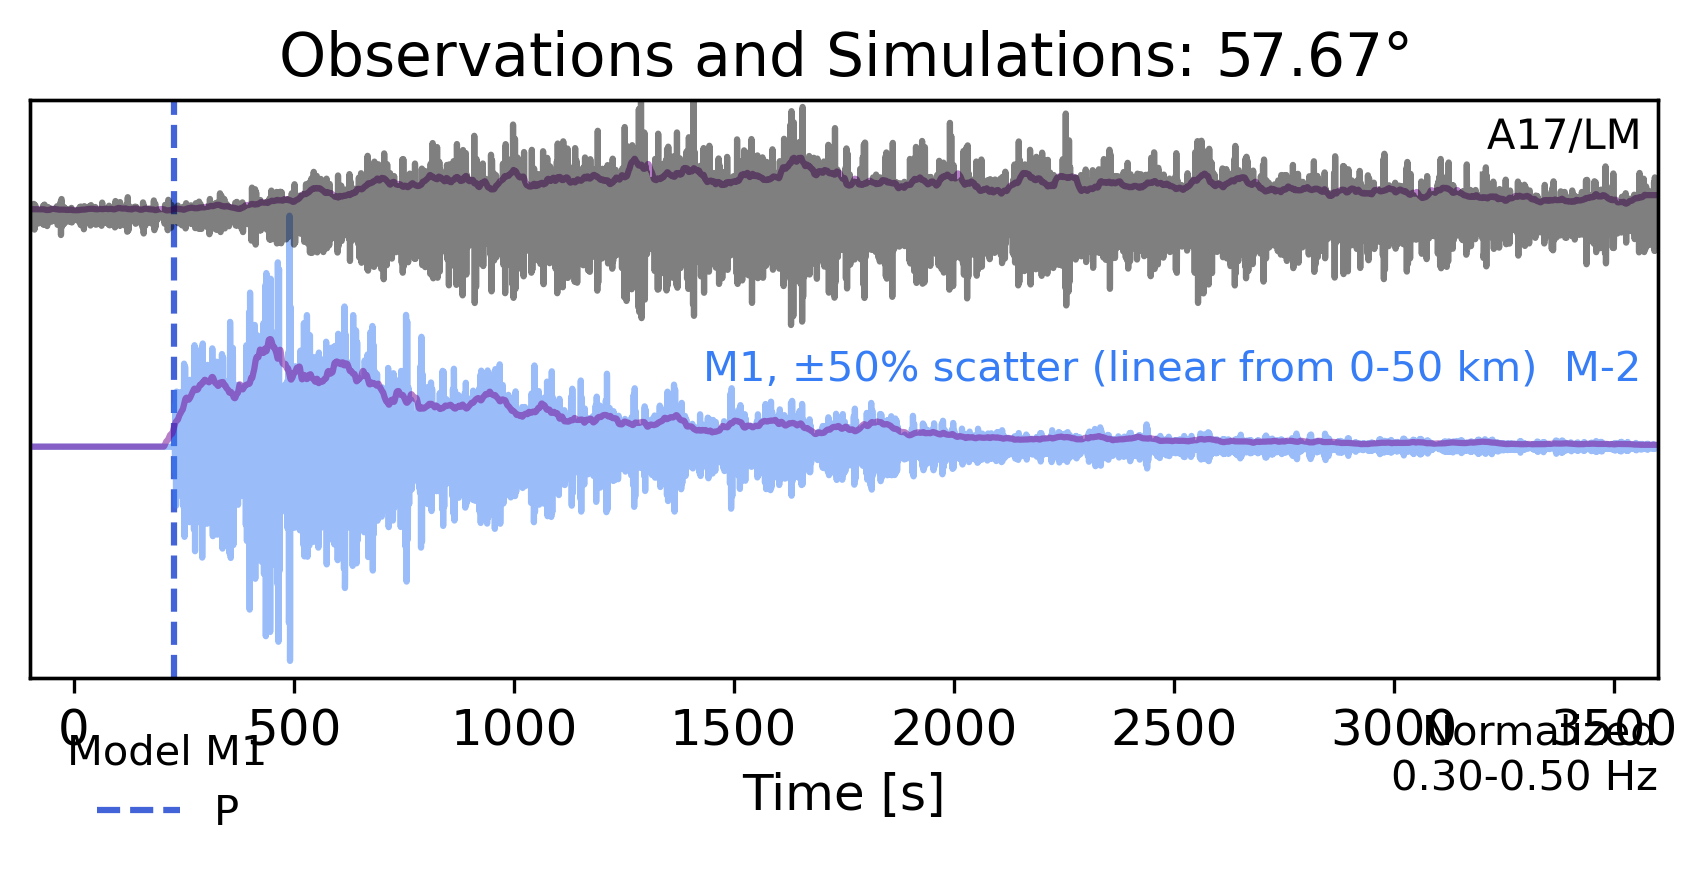

In [27]:
# compare M-2 with observations

run_list = [
'145we_ISSI_atten_linear50_2', # M1, ±50% scatter (linear from 0-50 km)
]

freqmin=0.3
freqmax=0.5

scale_list = [
1,   # observation
2,   # '145we_ISSI_atten_linear50_2', # M1, ±50% scatter (linear from 0-50 km)
             ] 

for tr in original_observation_stream_local_MH:
    observation_stream = Stream()
    observation_stream.append(tr.copy())
    distance_in_degree = tr.stats.distance_in_degree

    # quick fudge to view the MH1 channel if it's the only one available
    if tr.stats.channel == 'MH1':
        print('Warning - changing channel name of', tr.id)
        tr.stats.channel = 'MHZ'

    plot_envelope_taup(original_stream=None,
                       original_stream_dict=original_stream_dict,run_list=run_list,
                       observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_in_degree,
                       inv=inv,
                       model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                             title=None,freqmin=freqmin,freqmax=freqmax,
                             startsecond=-100, endsecond=3600,channel='Z',
        
                                  normalize='relative', scale_list=scale_list, phase_list=["P"],
                                  smooth_periods=10,plot_seismogram=True,taup_show=True,plot_envelope=False,plot_envelope_one_color=True,plot_derivative=False,
                                  annotate_relative=False,
                                  save_fig=False,figsize=(7,2.5 )
                                 )
    # break

## Section 3 - Compare observations with events modeled in Onodera et al., 2021 and Onodera et al., 2023

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 0.00040942864476554904
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 5.075044339909034
Suppressing secondary arrivals


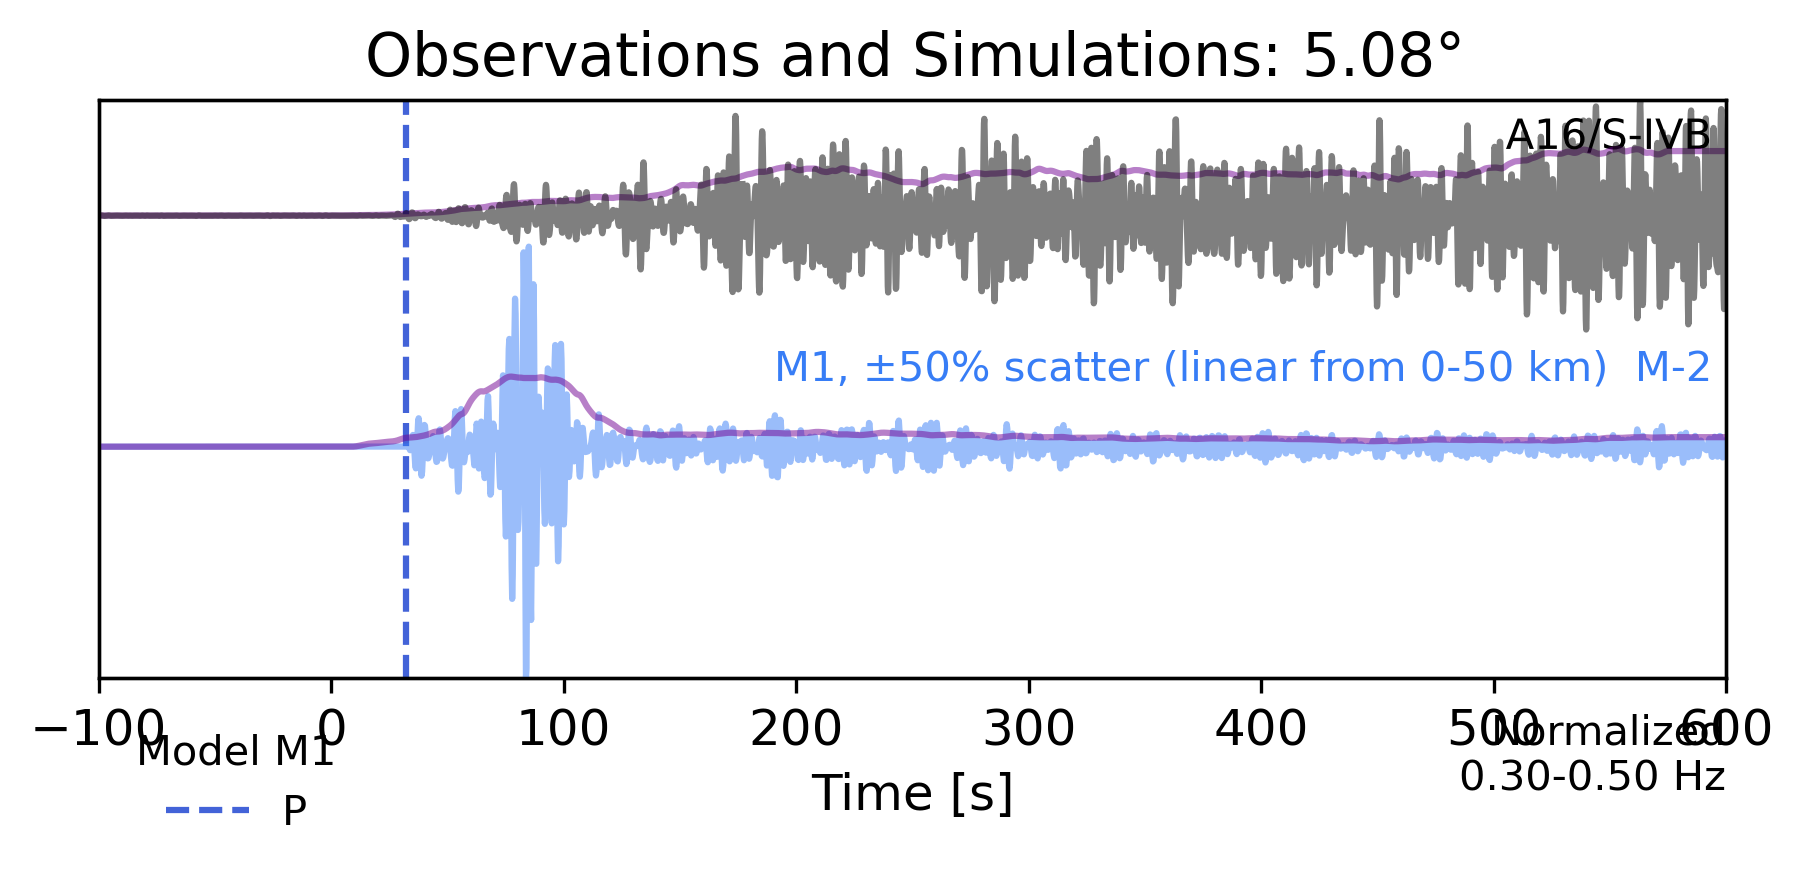

Calculated using model :  Model M1
Observations: smooth_periods=10, smoothie=165 smoothing length=24.9 s
0 0.0008581964140580311
Simulation: 145we_ISSI_atten_linear50_2, smooth_periods=10, smoothie=101 smoothing length=24.9 s
Source Depth=0.001 km, Distance in degrees 5.783787517596895
Suppressing secondary arrivals


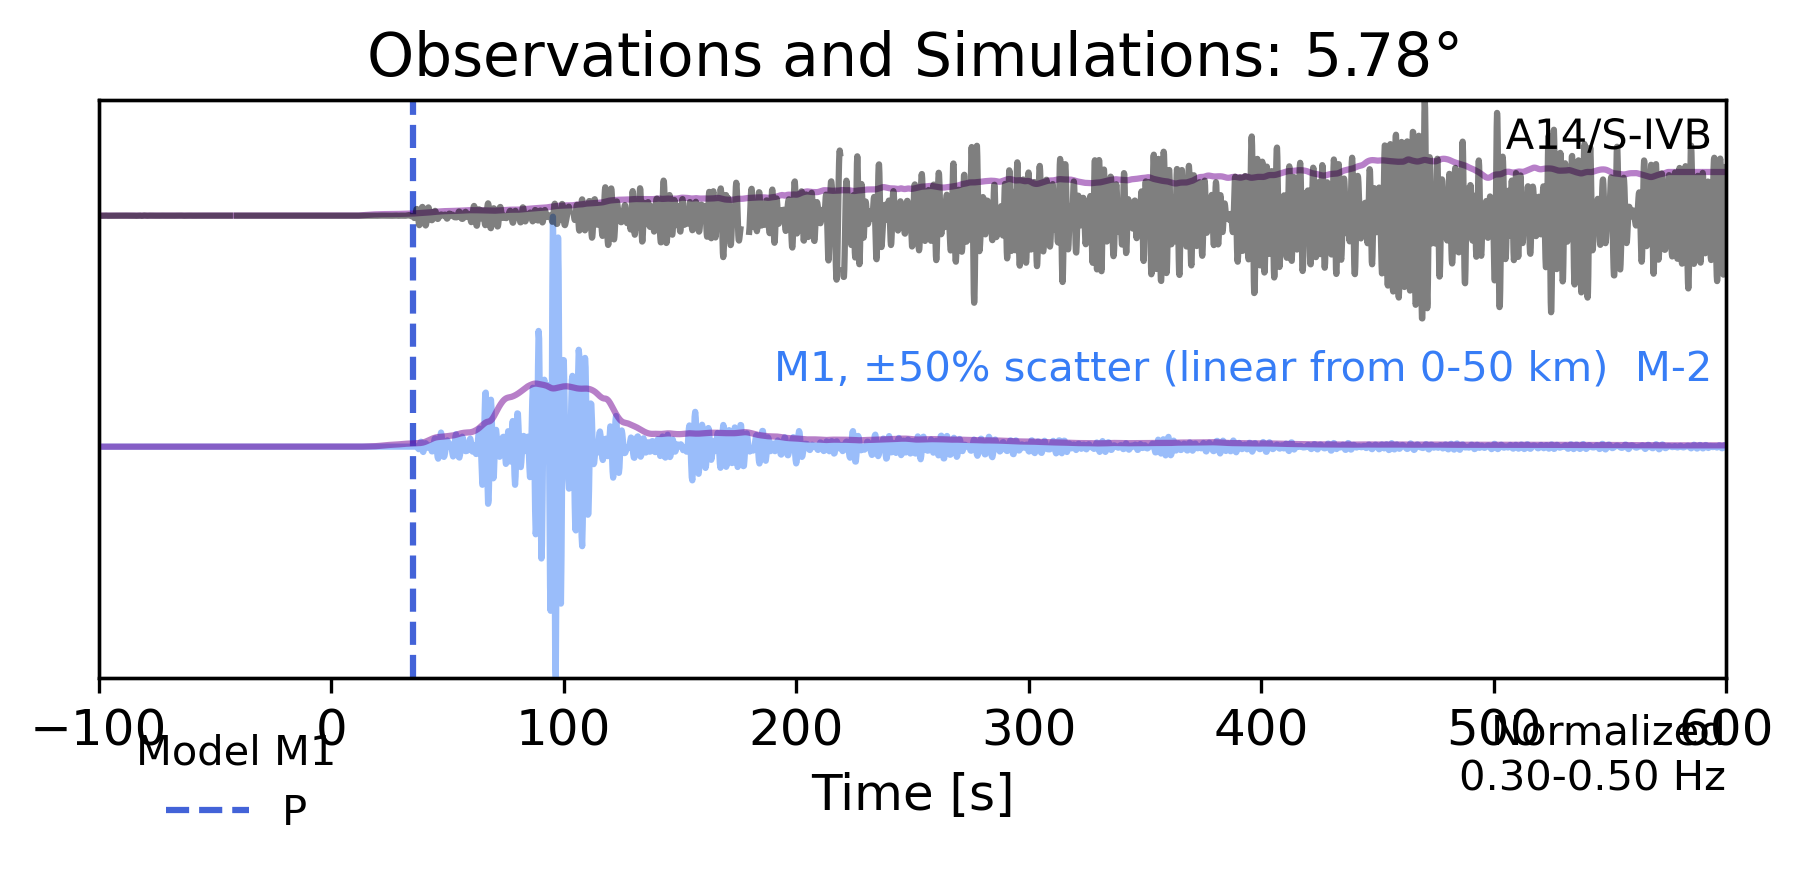

In [31]:
# compare M-2 with observations modeled in Onodera et al., 2021 and Onodera et al., 2023

run_list = [
'145we_ISSI_atten_linear50_2', # M1, ±50% scatter (linear from 0-50 km)
]

freqmin=0.3
freqmax=0.5

scale_list = [
1,   # observation
2,   # '145we_ISSI_atten_linear50_2', # M1, ±50% scatter (linear from 0-50 km)
             ] 

for tr in original_observation_stream_local_MH:
    # observation_stream = Stream()
    # observation_stream.append(tr.copy())
    distance_in_degree = tr.stats.distance_in_degree

    # quick fudge to view the MH1 channel if it's the only one available
    if tr.stats.channel == 'MH1':
        print('Warning - changing channel name of', tr.id)
        tr.stats.channel = 'MHZ'

    if math.isclose(5.783787517596895,distance_in_degree,abs_tol=0.01) or math.isclose(5.0750443399,distance_in_degree,abs_tol=0.01): 
        
        plot_envelope_taup(original_stream=None,
                           original_stream_dict=original_stream_dict,run_list=run_list,
                           observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_in_degree,
                           inv=inv,
                           model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                                 title=None,freqmin=freqmin,freqmax=freqmax,
                                 startsecond=-100, endsecond=600,channel='Z',
            
                                      normalize='relative', scale_list=scale_list, phase_list=["P"],
                                      smooth_periods=10,plot_seismogram=True,taup_show=True,plot_envelope=False,plot_envelope_one_color=True,plot_derivative=False,
                                      annotate_relative=False,
                                      save_fig=False,figsize=(7,2.5 )
                                     )